In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Part_1_Crime_Data.csv"
df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/834827040.py:8: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


In [ ]:
# Filter relevant columns
columns_of_interest = ['RowID', 'CrimeDateTime', 'CrimeCode', 'Description', 'Neighborhood']
df = df[columns_of_interest]


df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors = 'coerce').dt.strftime('%m%Y')
df['CrimeDateTime'] = df['CrimeDateTime'].fillna(0)
df['Year'] = pd.to_datetime(df['CrimeDateTime']).dt.strftime('%Y').astype(int)
df = df[(df['Year'] >= 2017)& (df['Year'] <= 2022) ]
df


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/3345278015.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['CrimeDateTime']).dt.strftime('%Y').astype(int)


,RowID,CrimeDateTime,CrimeCode,Description,Neighborhood,Year
113,114,072021,2A,RAPE,EDMONDSON VILLAGE,2021
114,115,072021,4E,COMMON ASSAULT,LEVINDALE,2021
115,116,072021,6D,LARCENY FROM AUTO,SANDTOWN-WINCHESTER,2021
116,117,072021,6J,LARCENY,LAKELAND,2021
117,118,072021,5A,BURGLARY,MADISON PARK,2021
...,...,...,...,...,...,...
571732,571733,012017,4E,COMMON ASSAULT,ALLENDALE,2017
571733,571734,012017,6D,LARCENY FROM AUTO,BUTCHER'S HILL,2017
571734,571735,012017,4D,AGG. ASSAULT,RESERVOIR HILL,2017
571735,571736,012017,4C,AGG. ASSAULT,HAMILTON HILLS,2017


In [ ]:
# Group data by year and neighborhood, calculate counts
crime_counts = df.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
crime_counts_pivot = crime_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)



In [ ]:
# Calculate the difference in counts from 2017 to 2022
print("Table showing the difference of counts from 2017 to 2022:")
crime_counts_pivot['Difference'] = crime_counts_pivot[2022] - crime_counts_pivot[2017]
print(crime_counts_pivot['Difference'])

Table showing the difference of counts from 2017 to 2022:
Neighborhood
ABELL                -47.0
ALLENDALE           -102.0
ARCADIA              -24.0
ARLINGTON            -47.0
ARMISTEAD GARDENS    -46.0
                     ...  
WYMAN PARK            -6.0
WYNDHURST            -16.0
Woodmere               0.0
YALE HEIGHTS         -22.0
YORK-HOMELAND         35.0
Name: Difference, Length: 295, dtype: float64


In [ ]:
# Calculate the percentage change
print("\nTable showing the percentage change from 2017 to 2022:")
crime_counts_pivot['PercentageChange'] = (crime_counts_pivot['Difference'] / crime_counts_pivot[2017]) * 100
print(crime_counts_pivot['PercentageChange'])


Table showing the percentage change from 2017 to 2022:
Neighborhood
ABELL                -32.638889
ALLENDALE            -37.226277
ARCADIA              -42.857143
ARLINGTON            -18.431373
ARMISTEAD GARDENS    -23.711340
                        ...    
WYMAN PARK            -8.333333
WYNDHURST            -47.058824
Woodmere                    NaN
YALE HEIGHTS         -20.370370
YORK-HOMELAND        194.444444
Name: PercentageChange, Length: 295, dtype: float64


In [ ]:
# Sort neighborhoods based on the difference
sorted_neighborhoods = crime_counts_pivot.sort_values(by='Difference', ascending=False)
crime_vs_year = sorted_neighborhoods
print(sorted_neighborhoods)


Year                      2017    2018    2019   2020   2021   2022  \
Neighborhood                                                          
FEDERAL HILL             202.0   239.0   262.0  123.0  192.0  298.0   
MID-TOWN BELVEDERE       341.0   380.0   371.0  234.0  413.0  428.0   
FELLS POINT              487.0   527.0   506.0  344.0  434.0  564.0   
VIOLETVILLE              160.0   196.0   177.0  150.0  178.0  205.0   
UNIVERSITY OF MARYLAND   137.0   164.0   173.0  135.0  168.0  180.0   
...                        ...     ...     ...    ...    ...    ...   
BROOKLYN                1225.0  1014.0   773.0  651.0  745.0  977.0   
HAMILTON HILLS           644.0   487.0   494.0  395.0  314.0  390.0   
SANDTOWN-WINCHESTER      769.0   671.0   603.0  622.0  539.0  506.0   
FRANKFORD               1312.0  1071.0  1140.0  900.0  858.0  959.0   
BELAIR-EDISON           1159.0  1059.0   994.0  771.0  663.0  746.0   

Year                    Difference  PercentageChange  
Neighborhood         

In [ ]:
# Select top 5 and bottom 5 neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)
bottom_5_neighborhoods = sorted_neighborhoods.tail(5)

# Display summary tables
print("Top 5 Neighborhoods with Highest Increase:")
print(top_5_neighborhoods[['Difference', 'PercentageChange']])

print("\nTop 5 Neighborhoods with Highest Decrease:")
print(bottom_5_neighborhoods[['Difference', 'PercentageChange']])

Top 5 Neighborhoods with Highest Increase:
Year                    Difference  PercentageChange
Neighborhood                                        
FEDERAL HILL                  96.0         47.524752
MID-TOWN BELVEDERE            87.0         25.513196
FELLS POINT                   77.0         15.811088
VIOLETVILLE                   45.0         28.125000
UNIVERSITY OF MARYLAND        43.0         31.386861

Top 5 Neighborhoods with Highest Decrease:
Year                 Difference  PercentageChange
Neighborhood                                     
BROOKLYN                 -248.0        -20.244898
HAMILTON HILLS           -254.0        -39.440994
SANDTOWN-WINCHESTER      -263.0        -34.200260
FRANKFORD                -353.0        -26.905488
BELAIR-EDISON            -413.0        -35.634167


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/2212085525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y=top_5_neighborhoods.index, data=top_5_neighborhoods, palette='viridis')


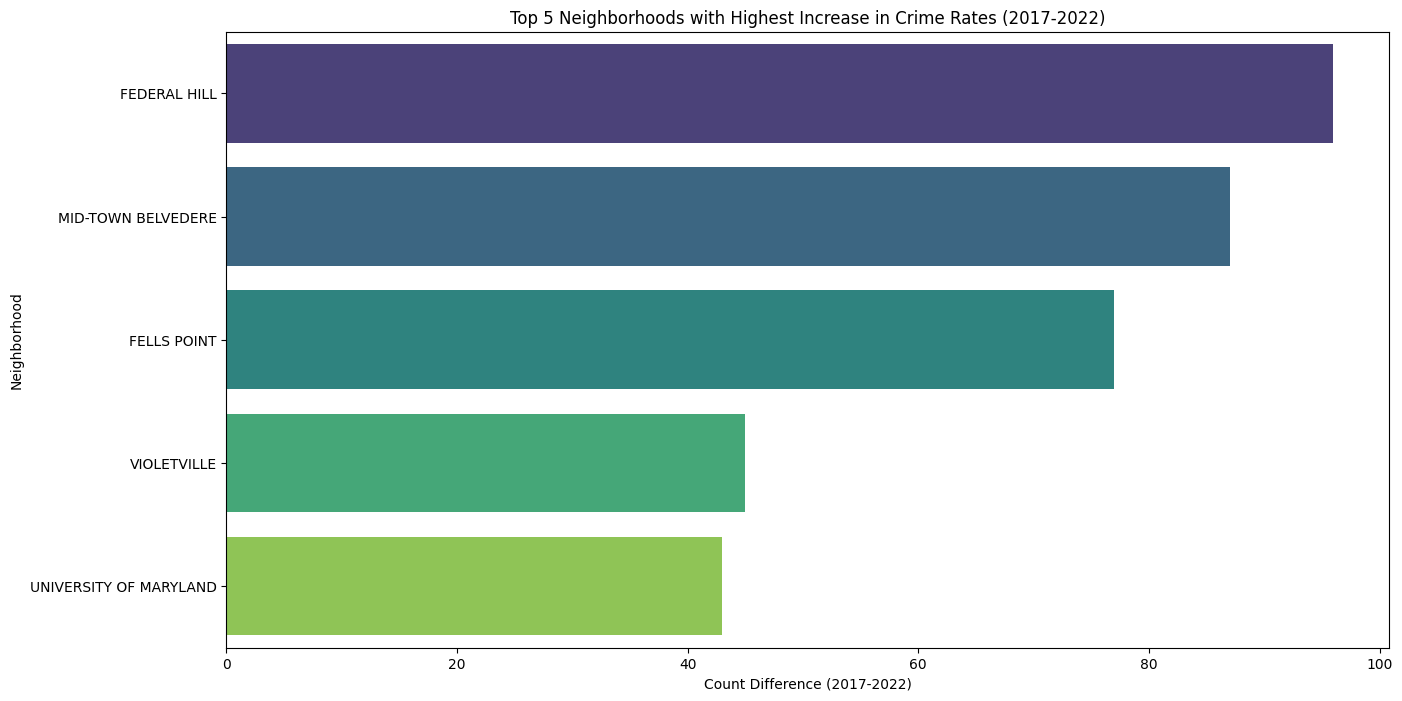

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/2212085525.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y=bottom_5_neighborhoods.index, data=bottom_5_neighborhoods, palette='magma')


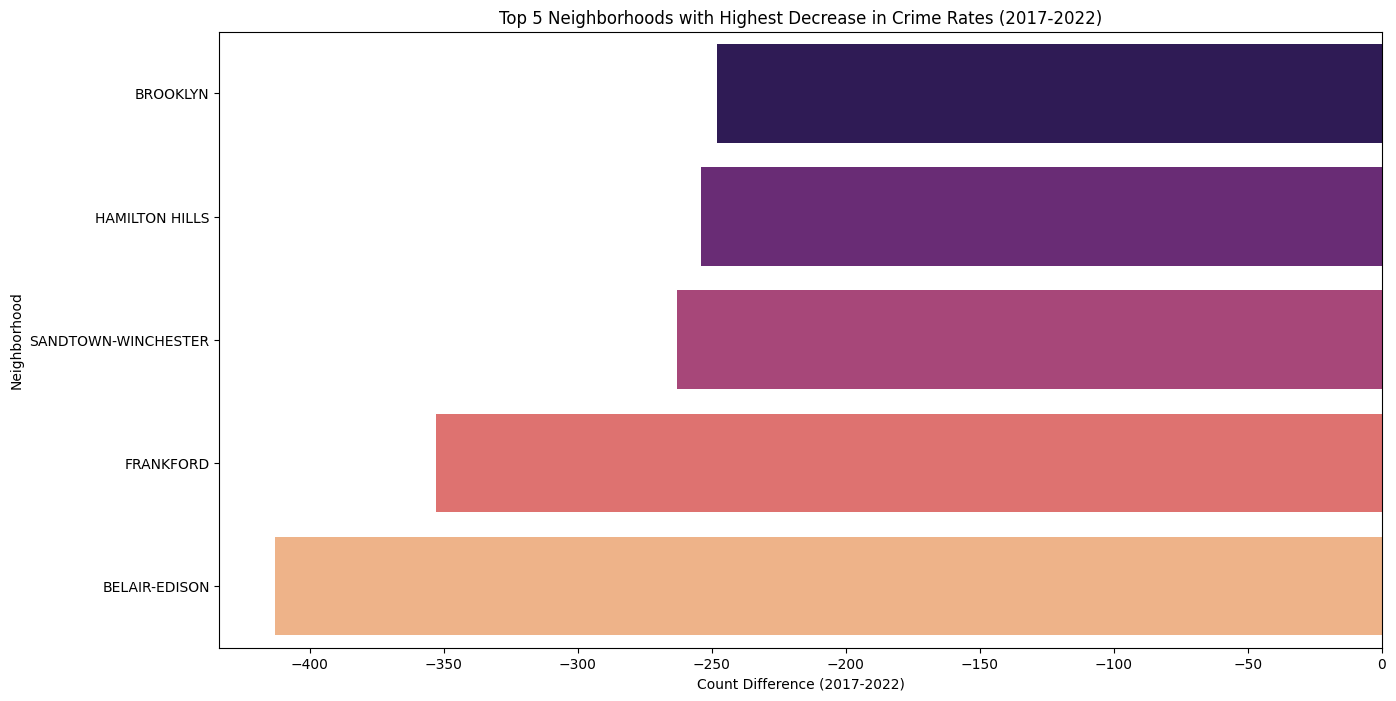

In [ ]:
# Create visualizations
plt.figure(figsize=(15, 8))
sns.barplot(x='Difference', y=top_5_neighborhoods.index, data=top_5_neighborhoods, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Increase in Crime Rates (2017-2022)')
plt.xlabel('Count Difference (2017-2022)')
plt.ylabel('Neighborhood')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Difference', y=bottom_5_neighborhoods.index, data=bottom_5_neighborhoods, palette='magma')
plt.title('Top 5 Neighborhoods with Highest Decrease in Crime Rates (2017-2022)')
plt.xlabel('Count Difference (2017-2022)')
plt.ylabel('Neighborhood')
plt.show()

In [ ]:
# Display the table
print("Table showing the count of crimes and how those numbers have varied each year:")
print(crime_counts_pivot)
crime_data_neighbothood_vs_year

Table showing the count of crimes and how those numbers have varied each year:
Year                2017   2018   2019   2020   2021   2022  Difference  \
Neighborhood                                                              
ABELL              144.0  109.0   98.0   72.0   70.0   97.0       -47.0   
ALLENDALE          274.0  244.0  247.0  178.0  164.0  172.0      -102.0   
ARCADIA             56.0   51.0   51.0   44.0   26.0   32.0       -24.0   
ARLINGTON          255.0  224.0  200.0  175.0  198.0  208.0       -47.0   
ARMISTEAD GARDENS  194.0  150.0  190.0  158.0  129.0  148.0       -46.0   
...                  ...    ...    ...    ...    ...    ...         ...   
WYMAN PARK          72.0   63.0   46.0   31.0   29.0   66.0        -6.0   
WYNDHURST           34.0   16.0   29.0   16.0   24.0   18.0       -16.0   
Woodmere             0.0    0.0    0.0    0.0    1.0    0.0         0.0   
YALE HEIGHTS       108.0  142.0  136.0  121.0   96.0   86.0       -22.0   
YORK-HOMELAND       1

In [ ]:
# Create a list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Filter the original DataFrame based on selected neighborhoods
selected_neighborhood_data = df[df['Neighborhood'].isin(selected_neighborhoods)]


In [ ]:
# Group data by year, neighborhood, and count incidents
selected_neighborhood_counts = selected_neighborhood_data.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
selected_neighborhood_counts_pivot = selected_neighborhood_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)

# Calculate the difference in counts from 2017 to 2022
selected_neighborhood_counts_pivot['Difference'] = selected_neighborhood_counts_pivot[2022] - selected_neighborhood_counts_pivot[2017]

# Display the table
print("\nTable showing the count of crimes and how those numbers have varied each year for selected neighborhoods:")
print(selected_neighborhood_counts_pivot)




Table showing the count of crimes and how those numbers have varied each year for selected neighborhoods:
Year                    2017  2018  2019  2020  2021  2022  Difference
Neighborhood                                                          
BELAIR-EDISON           1159  1059   994   771   663   746        -413
BROOKLYN                1225  1014   773   651   745   977        -248
FEDERAL HILL             202   239   262   123   192   298          96
FELLS POINT              487   527   506   344   434   564          77
FRANKFORD               1312  1071  1140   900   858   959        -353
HAMILTON HILLS           644   487   494   395   314   390        -254
MID-TOWN BELVEDERE       341   380   371   234   413   428          87
SANDTOWN-WINCHESTER      769   671   603   622   539   506        -263
UNIVERSITY OF MARYLAND   137   164   173   135   168   180          43
VIOLETVILLE              160   196   177   150   178   205          45


In [ ]:
# Display the selected neighborhood data
print("\nSelected neighborhood data:")
print(selected_neighborhood_data)



Selected neighborhood data:
         RowID CrimeDateTime CrimeCode        Description  \
115        116        072021        6D  LARCENY FROM AUTO   
123        124        082021        6D  LARCENY FROM AUTO   
126        127        082021        4E     COMMON ASSAULT   
214        215        082021        4E     COMMON ASSAULT   
215        216        082021        7A         AUTO THEFT   
...        ...           ...       ...                ...   
565761  565762        012017        7A         AUTO THEFT   
565768  565769        012017       3AF            ROBBERY   
565769  565770        012017        5A           BURGLARY   
565772  565773        012017        5B           BURGLARY   
571735  571736        012017        4C       AGG. ASSAULT   

               Neighborhood  Year  
115     SANDTOWN-WINCHESTER  2021  
123                BROOKLYN  2021  
126           BELAIR-EDISON  2021  
214           BELAIR-EDISON  2021  
215           BELAIR-EDISON  2021  
...                   

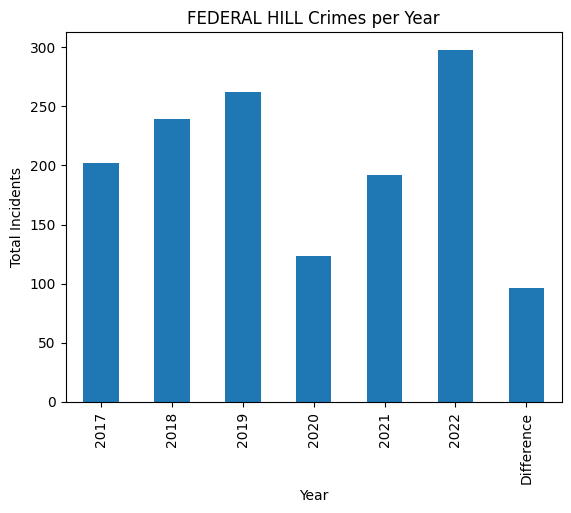

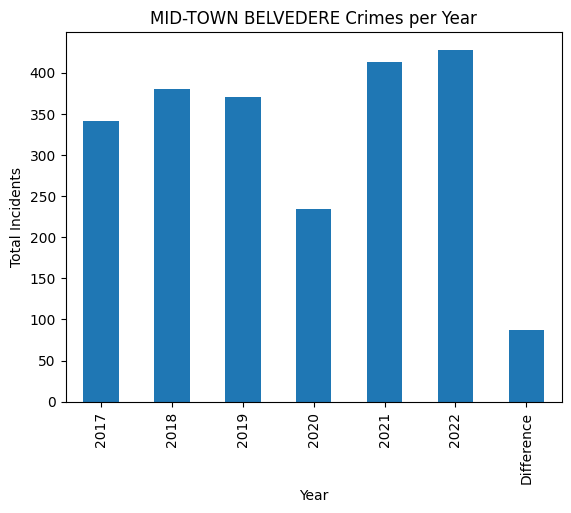

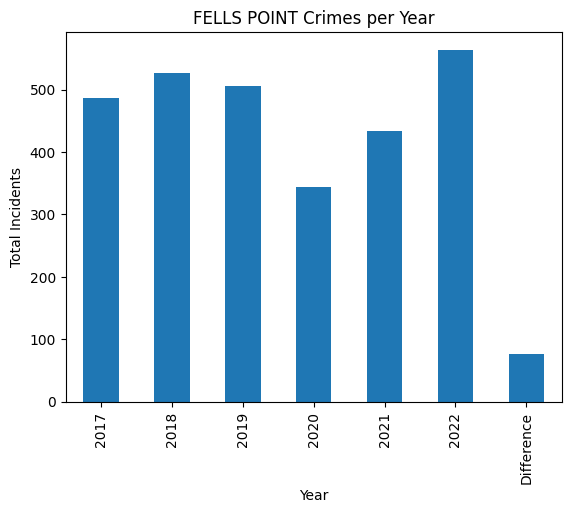

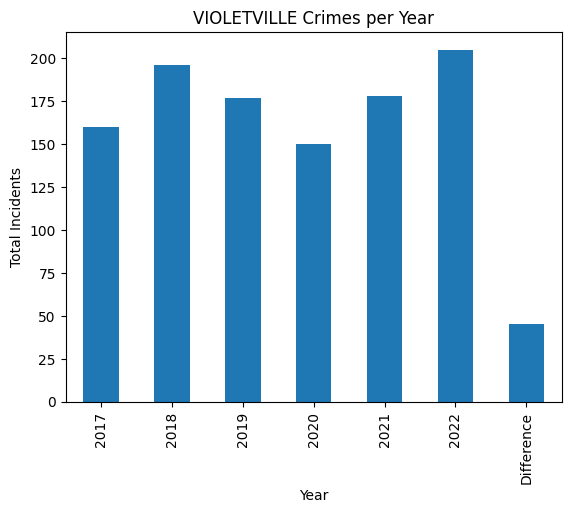

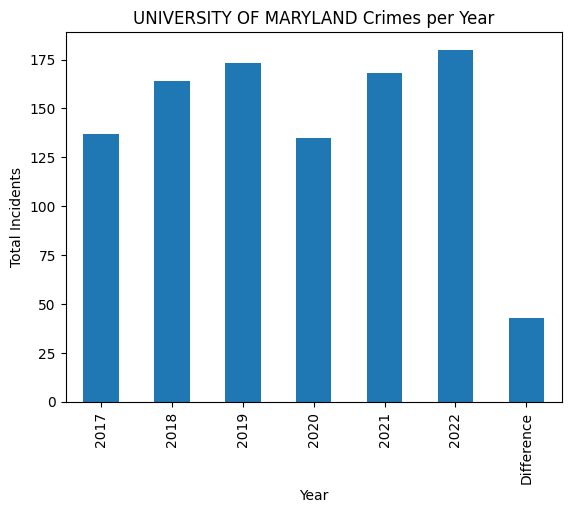

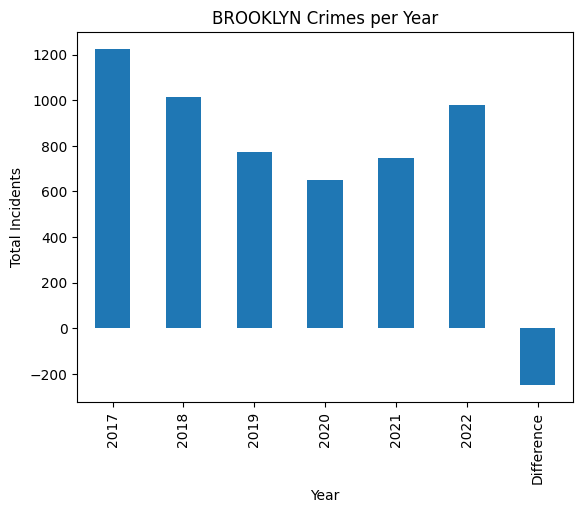

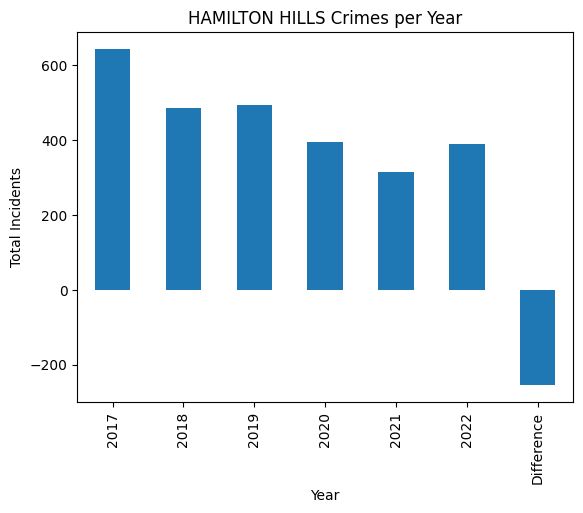

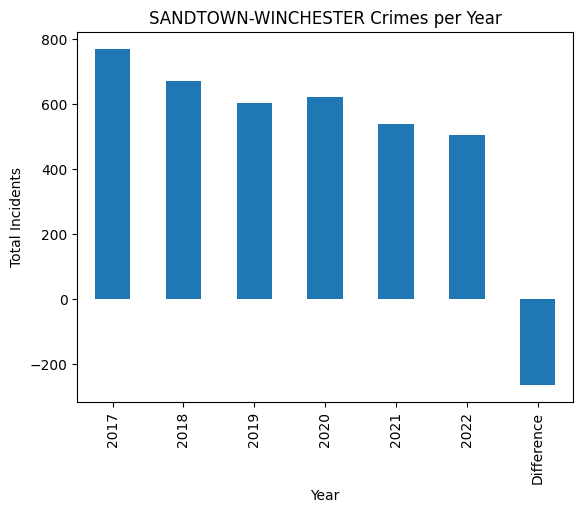

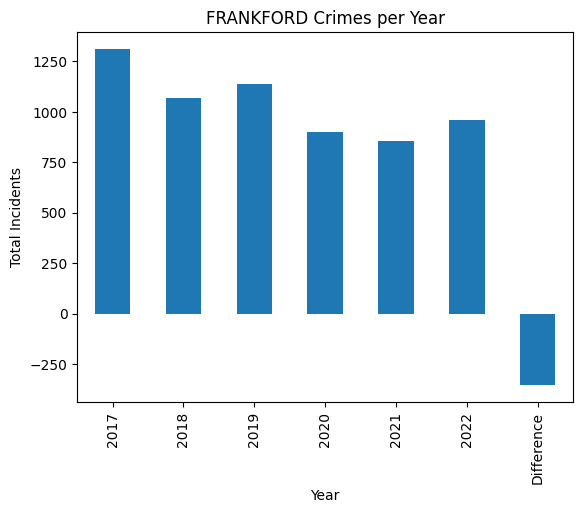

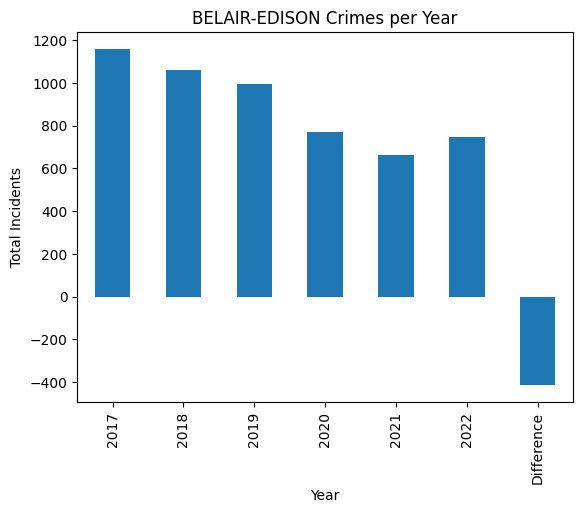

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
for neighborhood in selected_neighborhoods:

    # Extract data
    data = counts_df.loc[neighborhood]

    # Plot bar chart
    data.plot(kind='bar')

    # Customize chart
    plt.title(f'{neighborhood} Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.show()


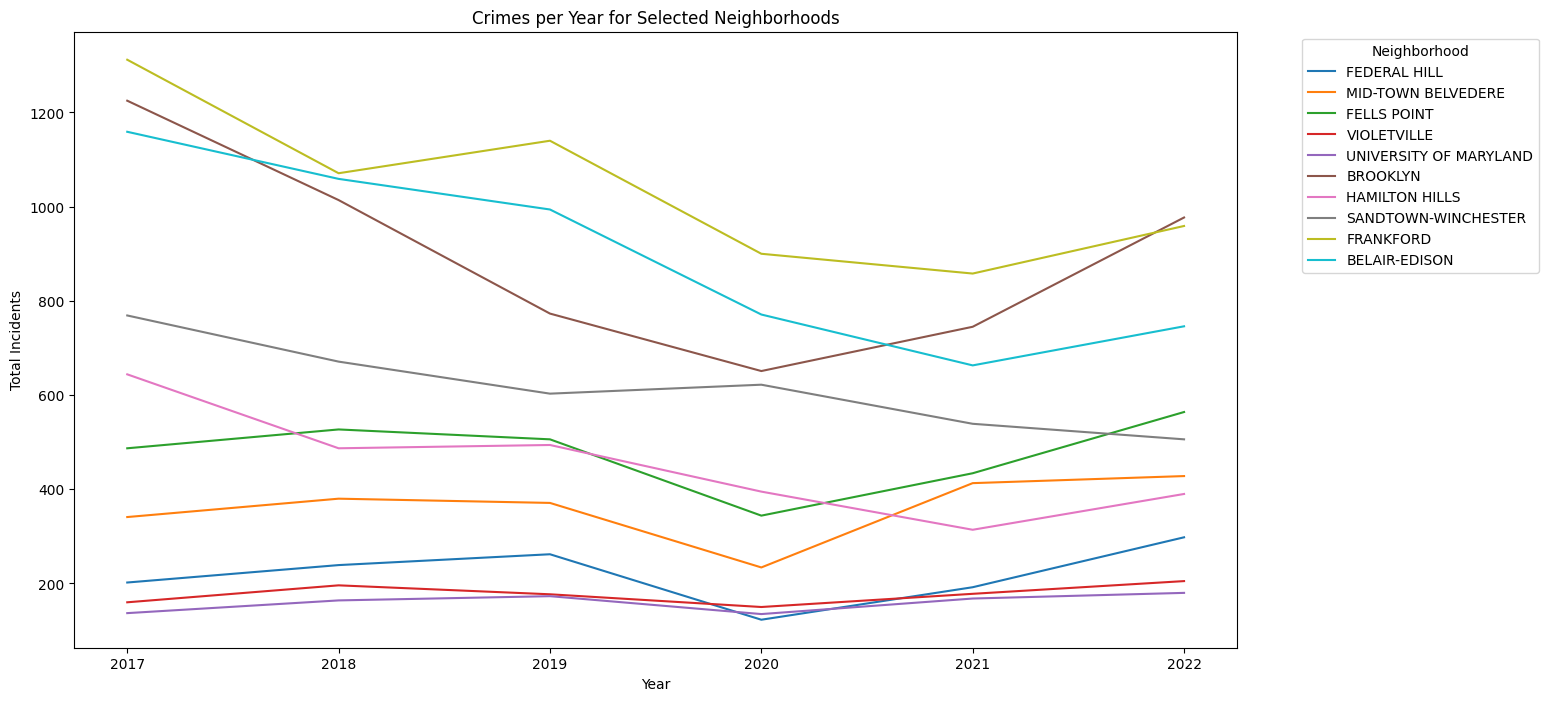

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
plt.figure(figsize=(15, 8))

for neighborhood in selected_neighborhoods:
    # Extract data, excluding the 'Difference' column
    data = counts_df.loc[neighborhood].drop('Difference', errors='ignore')

    # Plot line chart for each neighborhood on the same plot
    plt.plot(data.index, data, label=neighborhood)

# Customize chart
plt.title('Crimes per Year for Selected Neighborhoods')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

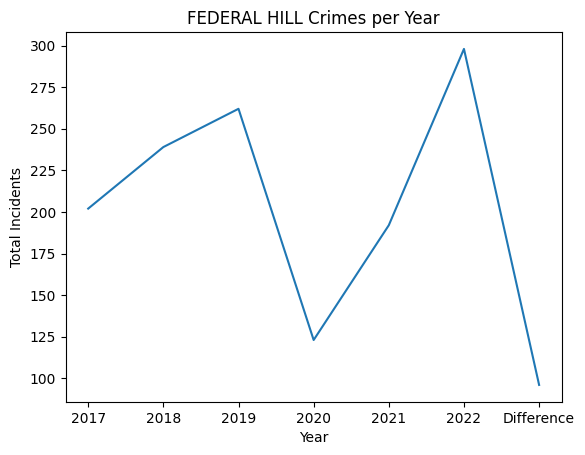

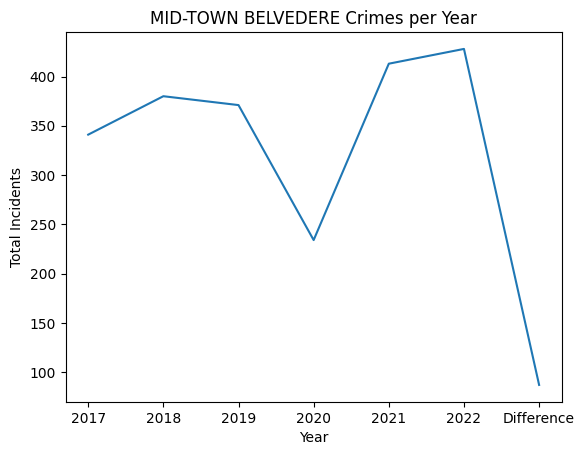

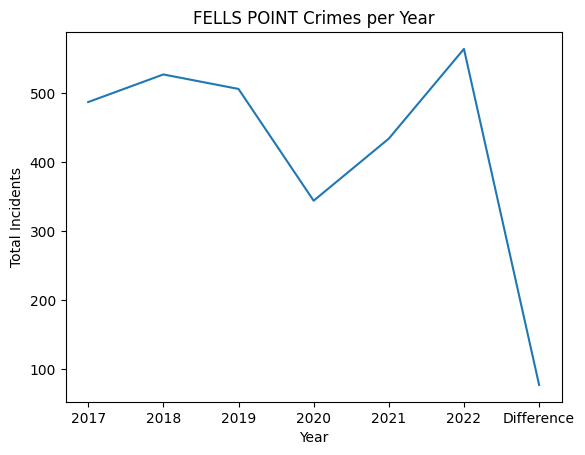

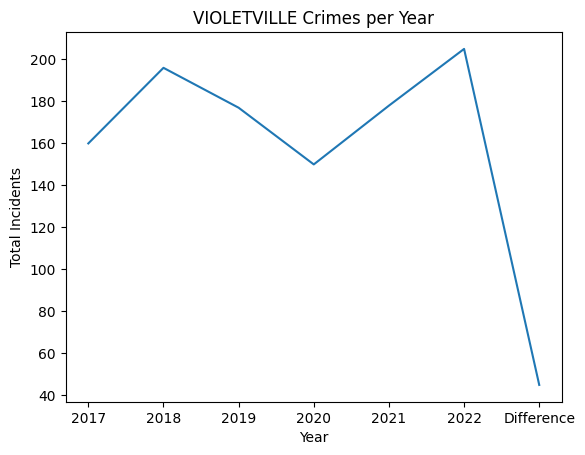

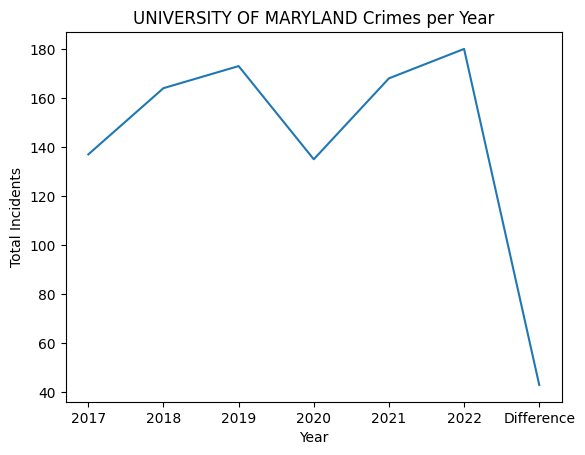

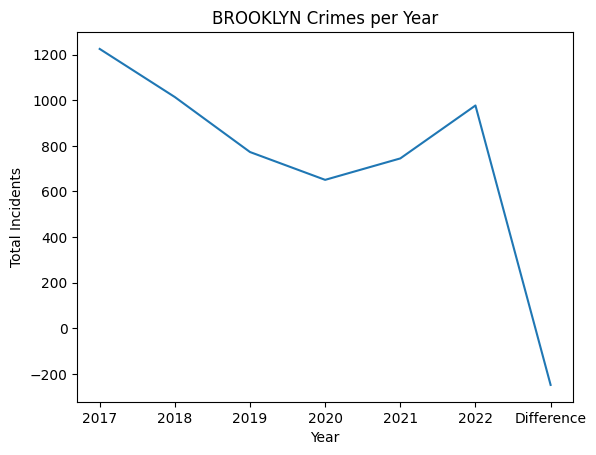

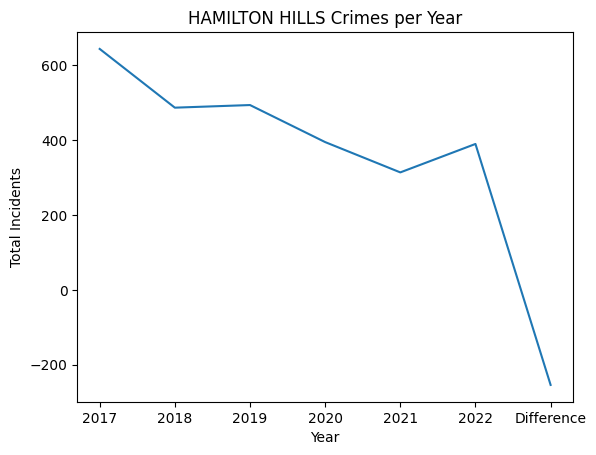

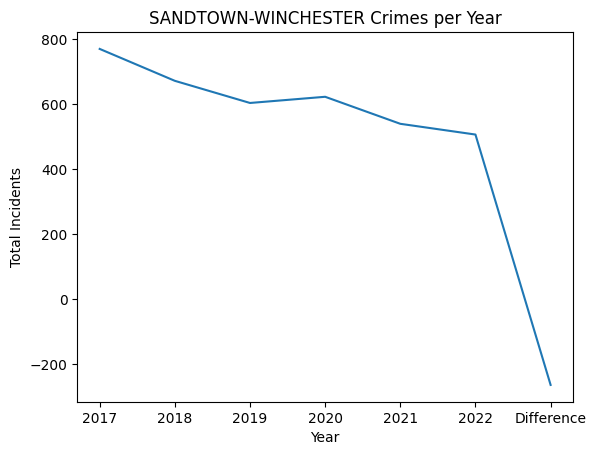

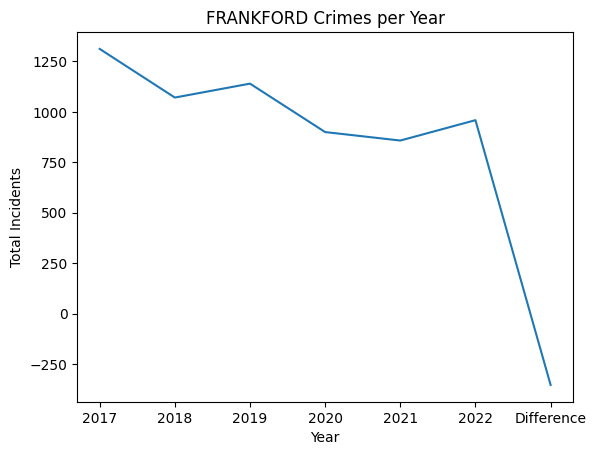

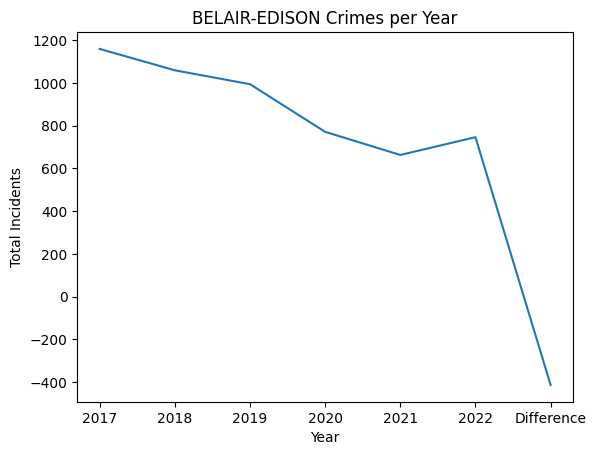

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
for neighborhood in selected_neighborhoods:

    # Extract data
    data = counts_df.loc[neighborhood]

    # Plot line chart
    data.plot(kind='line')

    # Customize chart
    plt.title(f'{neighborhood} Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.show()


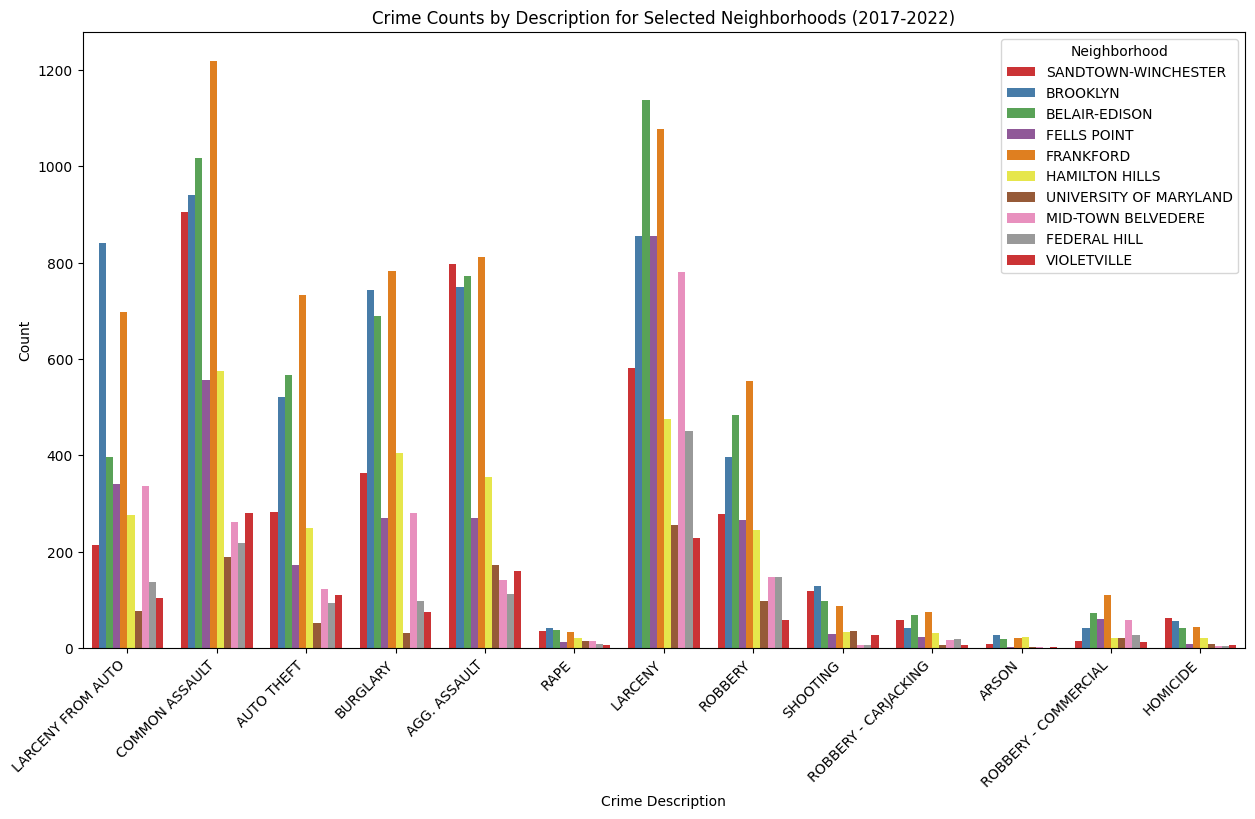

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Description', hue='Neighborhood', data=selected_neighborhood_data, palette='Set1')
plt.title('Crime Counts by Description for Selected Neighborhoods (2017-2022)')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Neighborhood')
plt.show()


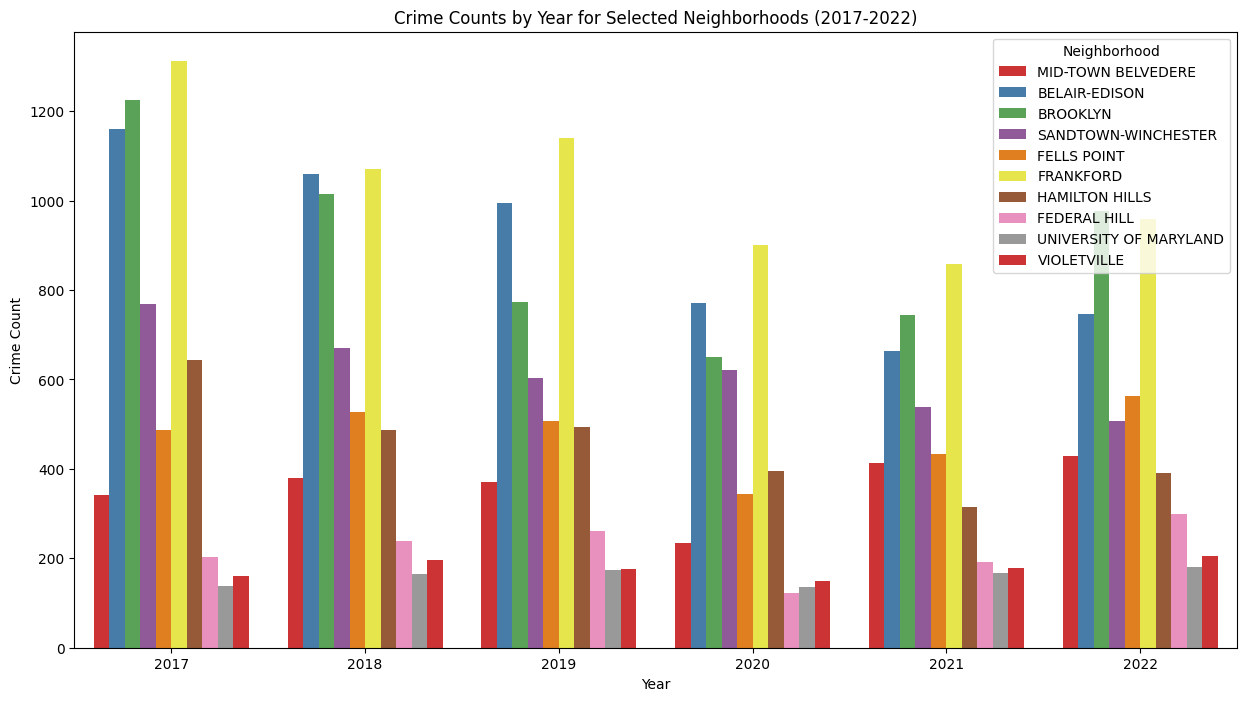

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Year', hue='Neighborhood', data=selected_neighborhood_data, palette='Set1')
plt.title('Crime Counts by Year for Selected Neighborhoods (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

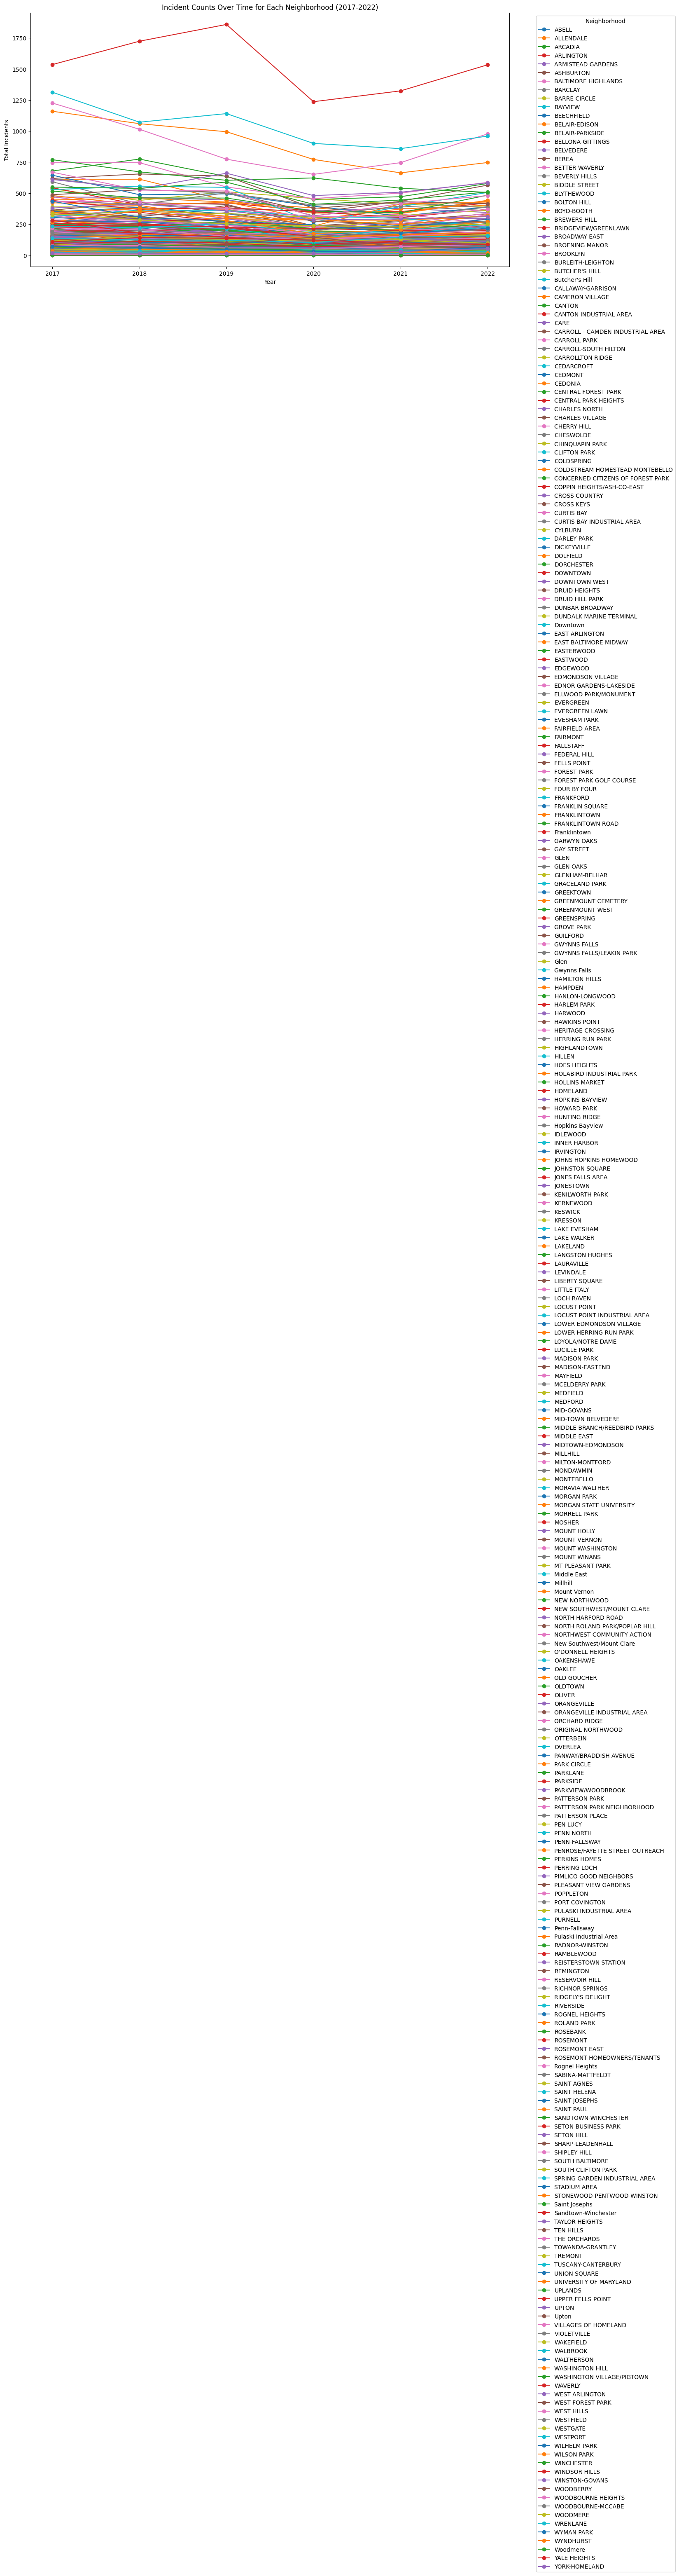

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and processed your data
# using the code provided in the previous responses

# Group data by year, neighborhood, and count incidents
neighborhood_counts = df.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
neighborhood_counts_pivot = neighborhood_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)

# Create a line plot for each neighborhood
plt.figure(figsize=(15, 8))
for neighborhood in neighborhood_counts_pivot.index:
    plt.plot(neighborhood_counts_pivot.columns, neighborhood_counts_pivot.loc[neighborhood], label=neighborhood, marker='o')

plt.title('Incident Counts Over Time for Each Neighborhood (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
file_path = "Part_1_Crime_Data.csv"
df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])



/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/387162538.py:7: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


In [ ]:
# Filter relevant columns
columns_of_interest = ['RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode', 'Description', 'Inside_Outside',
                        'Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'Old_District',
                        'New_District', 'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType']

df = df[columns_of_interest]

df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors = 'coerce').dt.strftime('%m%Y')
df['CrimeDateTime'] = df['CrimeDateTime'].fillna(0)
df['Year'] = pd.to_datetime(df['CrimeDateTime']).dt.strftime('%Y').astype(int)

df = df[(df['Year'] >= 2017)& (df['Year'] <= 2022) ]

# Group data by year and calculate citywide counts
citywide_counts = df.groupby('Year').size().reset_index(name='City_Total_Incidents')

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/3605512026.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['CrimeDateTime']).dt.strftime('%Y').astype(int)


In [ ]:
# Calculate differences
citywide_counts['Difference'] = citywide_counts['City_Total_Incidents'].diff().fillna(0)
print(citywide_counts)

   Year  City_Total_Incidents  Difference
0  2017                 52301         0.0
1  2018                 48600     -3701.0
2  2019                 46608     -1992.0
3  2020                 36306    -10302.0
4  2021                 36734       428.0
5  2022                 40637      3903.0


In [ ]:
# Calculate percentage change
citywide_counts['PercentageChange'] = (citywide_counts['Difference'] /
                                citywide_counts['City_Total_Incidents'].shift(1)) * 100
print(citywide_counts['PercentageChange'])

0          NaN
1    -7.076347
2    -4.098765
3   -22.103502
4     1.178869
5    10.625034
Name: PercentageChange, dtype: float64


In [ ]:
print("Citywide Analysis:")
print(citywide_counts[['Difference', 'PercentageChange',]])

Citywide Analysis:
   Difference  PercentageChange
0         0.0               NaN
1     -3701.0         -7.076347
2     -1992.0         -4.098765
3    -10302.0        -22.103502
4       428.0          1.178869
5      3903.0         10.625034


In [ ]:
# Sort neighborhoods based on the difference
sorted_neighborhoods = citywide_counts.sort_values(by='Difference', ascending=False)

# Select top 5 and bottom 5 neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)
bottom_5_neighborhoods = sorted_neighborhoods.tail(5)

# Display summary tables for top and bottom neighborhoods
print("Top 5 Neighborhoods with Highest Increase:")
print(top_5_neighborhoods[['Year', 'City_Total_Incidents', 'Difference', 'PercentageChange']])

print("\nTop 5 Neighborhoods with Highest Decrease:")
print(bottom_5_neighborhoods[['Year', 'City_Total_Incidents', 'Difference', 'PercentageChange']])



Top 5 Neighborhoods with Highest Increase:
   Year  City_Total_Incidents  Difference  PercentageChange
5  2022                 40637      3903.0         10.625034
4  2021                 36734       428.0          1.178869
0  2017                 52301         0.0               NaN
2  2019                 46608     -1992.0         -4.098765
1  2018                 48600     -3701.0         -7.076347

Top 5 Neighborhoods with Highest Decrease:
   Year  City_Total_Incidents  Difference  PercentageChange
4  2021                 36734       428.0          1.178869
0  2017                 52301         0.0               NaN
2  2019                 46608     -1992.0         -4.098765
1  2018                 48600     -3701.0         -7.076347
3  2020                 36306    -10302.0        -22.103502


/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/2153306160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='City_Total_Incidents', data=top_5_neighborhoods, palette='viridis')


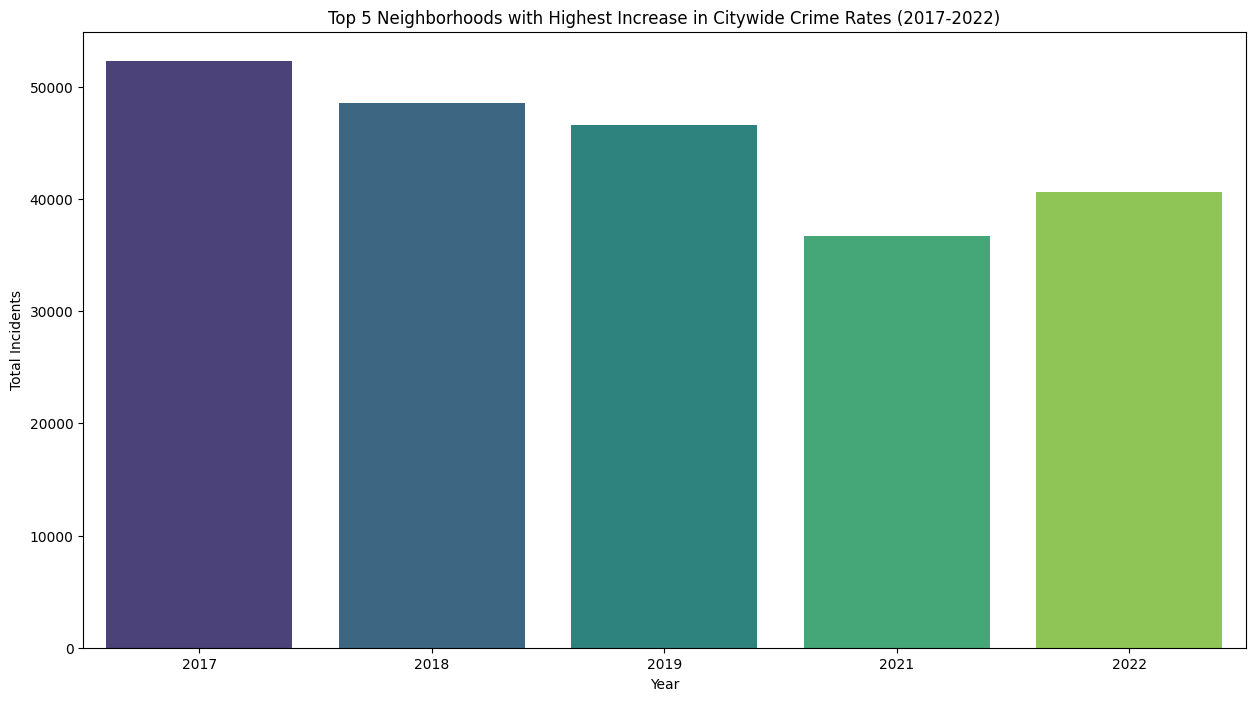

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/2153306160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='City_Total_Incidents', data=bottom_5_neighborhoods, palette='magma')


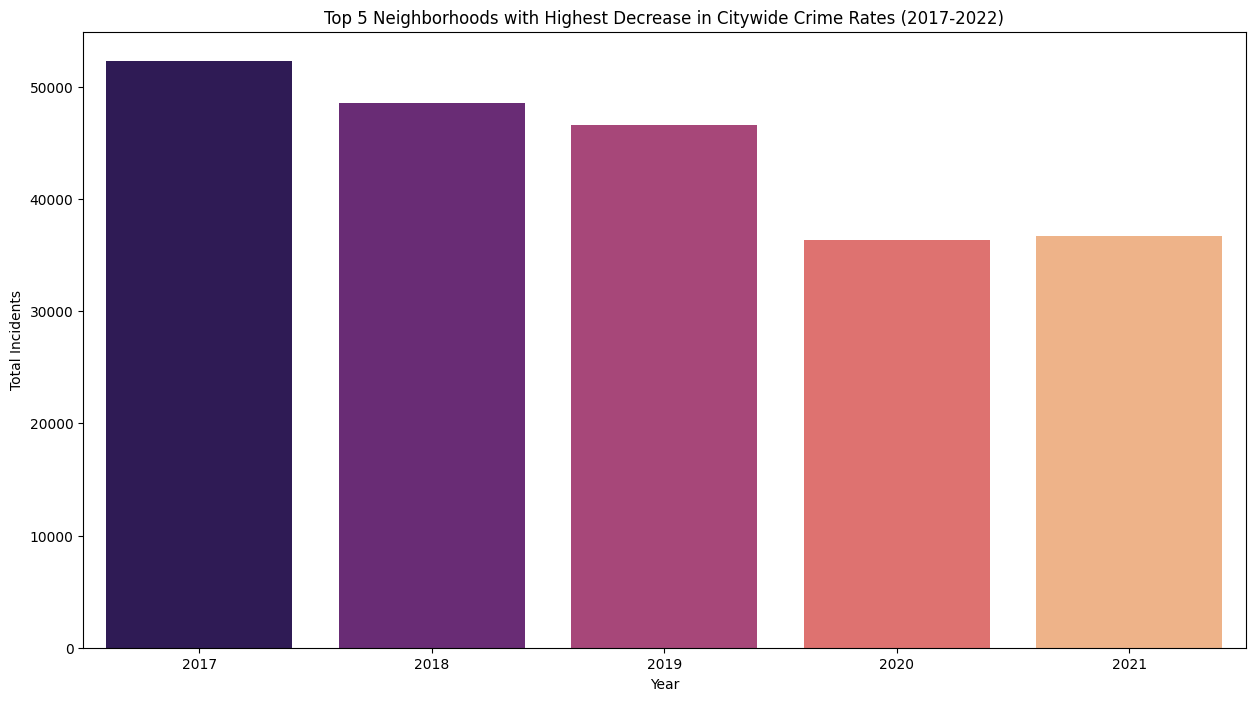

In [ ]:
# Create visualizations for top and bottom neighborhoods
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='City_Total_Incidents', data=top_5_neighborhoods, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Increase in Citywide Crime Rates (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='City_Total_Incidents', data=bottom_5_neighborhoods, palette='magma')
plt.title('Top 5 Neighborhoods with Highest Decrease in Citywide Crime Rates (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

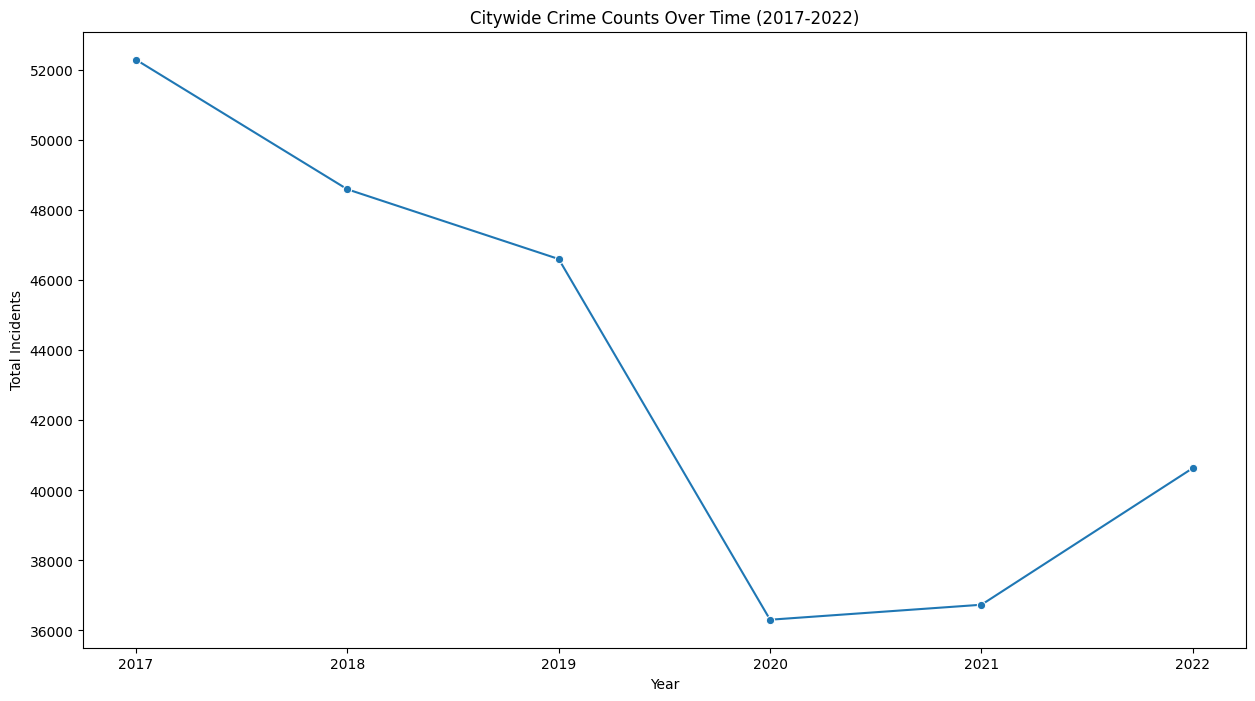

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


In [ ]:
vacant_building_notices = pd.read_csv("Vacant_Building_Notices.csv")

vacant_building_notices['DateNotice'] = pd.to_datetime(vacant_building_notices['DateNotice'], errors = 'coerce').dt.strftime('%m%Y')
vacant_building_notices['DateNotice'] = vacant_building_notices['DateNotice'].fillna(0)
vacant_building_notices['NoticeYear'] = pd.to_datetime(vacant_building_notices['DateNotice']).dt.strftime('%Y').astype(int)
vacant_building_notices = vacant_building_notices[(vacant_building_notices['NoticeYear'] >= 2017)& (vacant_building_notices['NoticeYear'] <= 2022)]
vacant_building_notices

grouped_by_vacant_notice = vacant_building_notices.groupby(['Neighborhood','NoticeYear'])['OBJECTID'].count().reset_index(name = 'vacant_count').sort_values(by='vacant_count', ascending = False)
grouped_by_vacant_notice

vacant_notice_vs_year = grouped_by_vacant_notice.pivot(index='Neighborhood', columns='NoticeYear', values='vacant_count')
vacant_notice_vs_year = vacant_notice_vs_year.dropna()
vacant_notice_vs_year["difference_of_vancant"] = vacant_notice_vs_year[2022] - vacant_notice_vs_year[2017]
vacant_notice_vs_year = vacant_notice_vs_year.sort_values(by = "difference_of_vancant", ascending = False)
vacant_notice_vs_year

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/122267090.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vacant_building_notices['NoticeYear'] = pd.to_datetime(vacant_building_notices['DateNotice']).dt.strftime('%Y').astype(int)


NoticeYear,2017,2018,2019,2020,2021,2022,difference_of_vancant
Neighborhood,,,,,,,
EAST BALTIMORE MIDWAY,16.0,12.0,16.0,24.0,22.0,55.0,39.0
CARROLLTON RIDGE,36.0,32.0,43.0,50.0,74.0,74.0,38.0
BROADWAY EAST,29.0,30.0,48.0,37.0,61.0,64.0,35.0
OLIVER,22.0,16.0,24.0,15.0,24.0,46.0,24.0
BROOKLYN,6.0,13.0,15.0,18.0,23.0,29.0,23.0
...,...,...,...,...,...,...,...
FRANKLINTOWN ROAD,10.0,10.0,9.0,7.0,9.0,8.0,-2.0
WINCHESTER,7.0,7.0,5.0,4.0,4.0,4.0,-3.0
BIDDLE STREET,12.0,8.0,8.0,4.0,6.0,8.0,-4.0


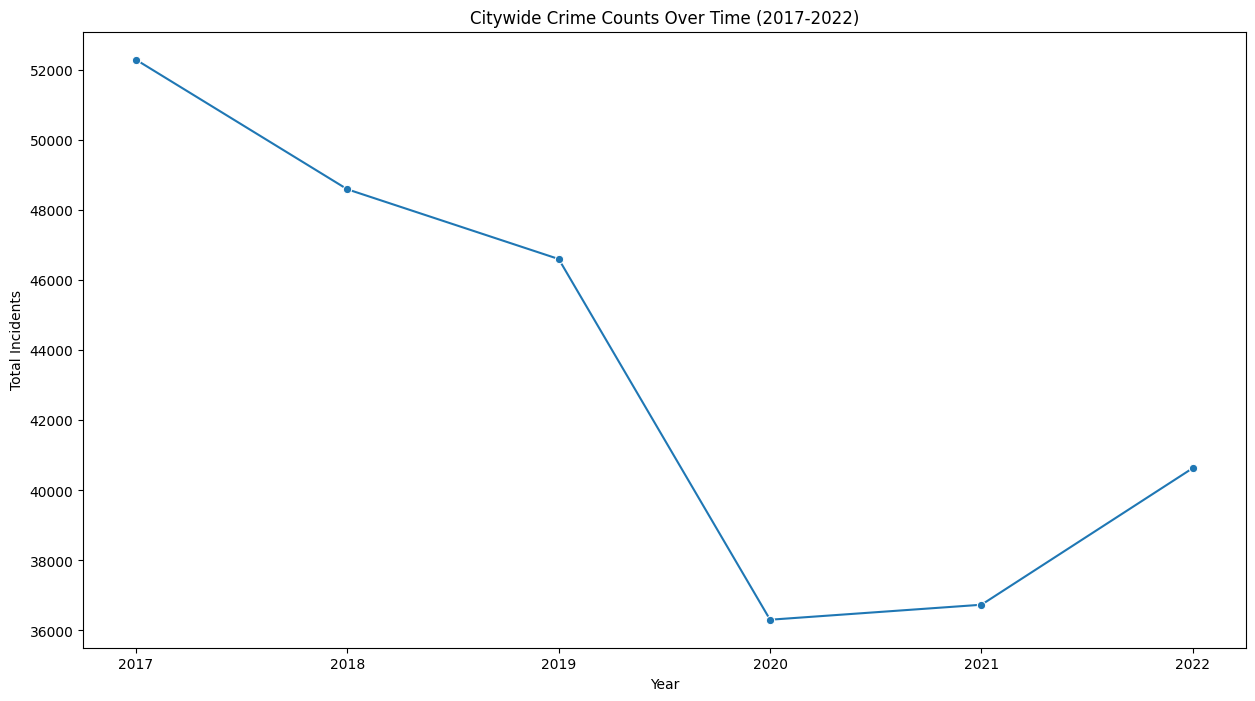

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


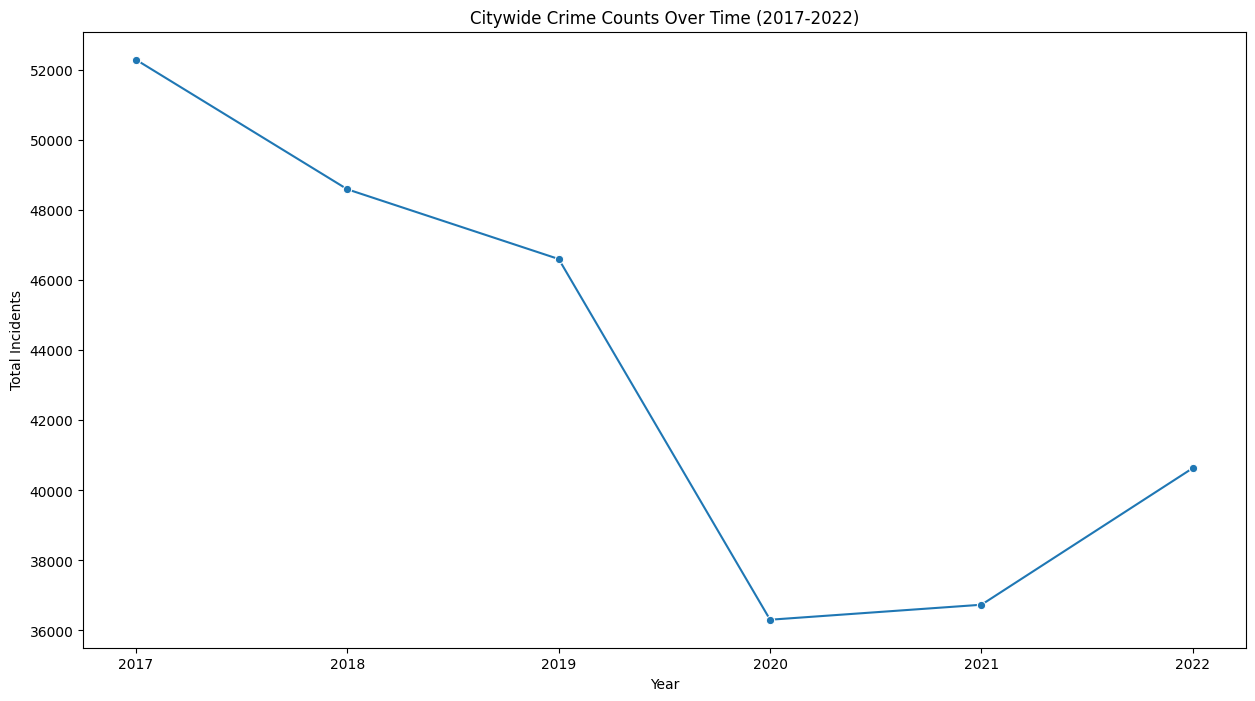

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


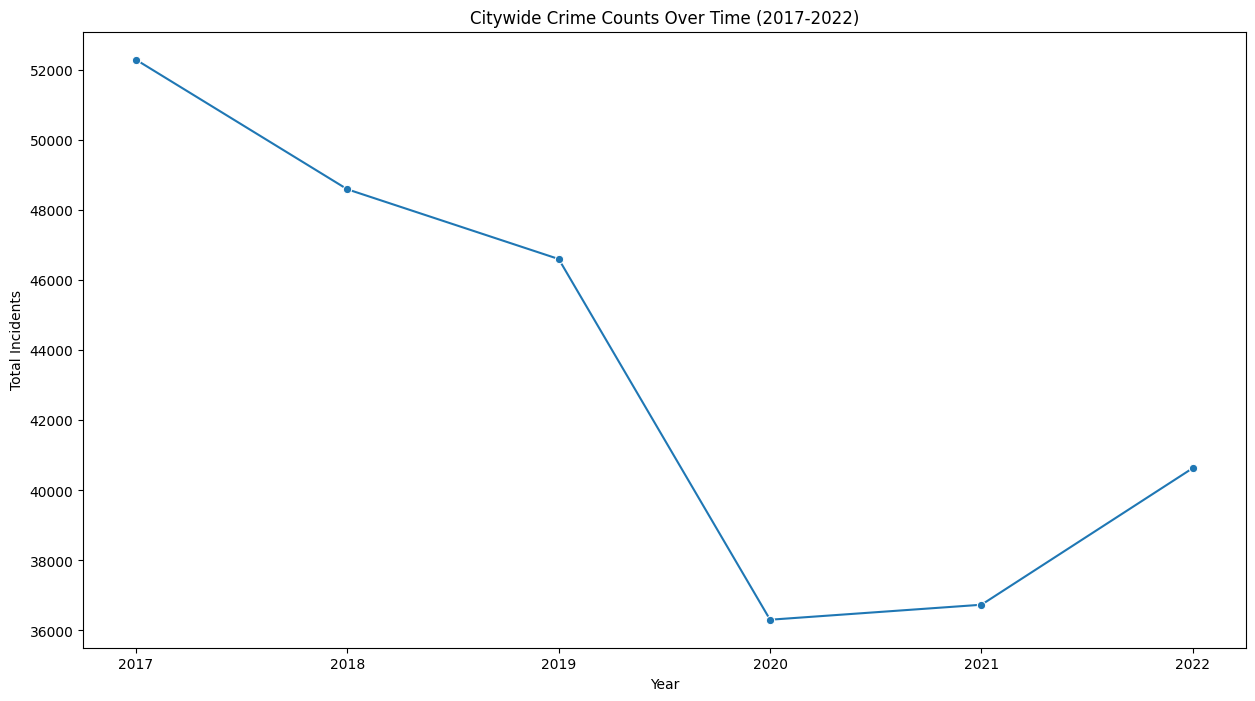

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


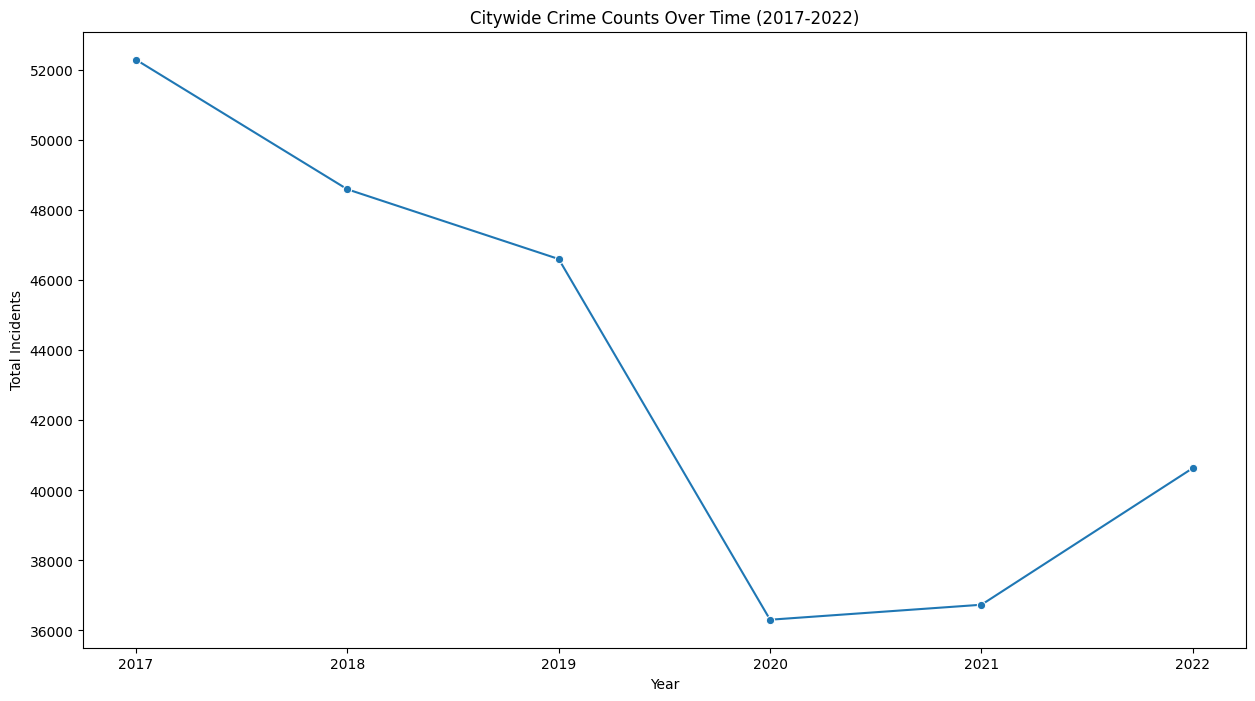

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


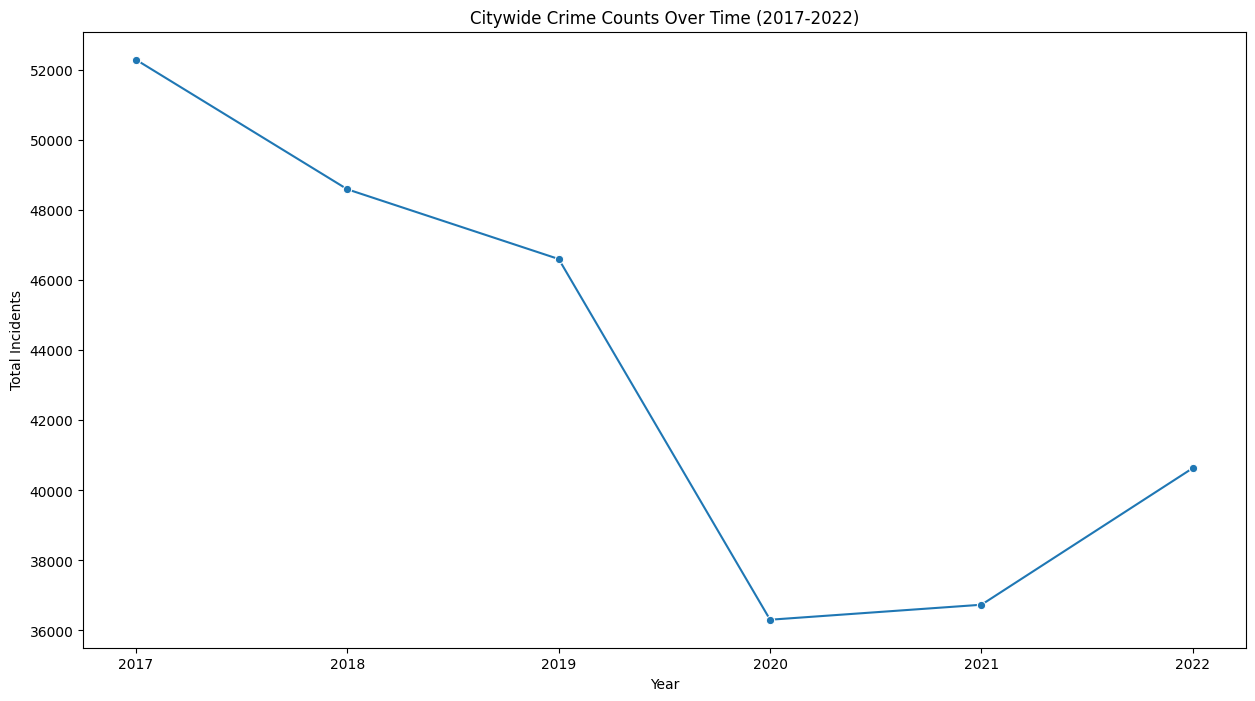

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


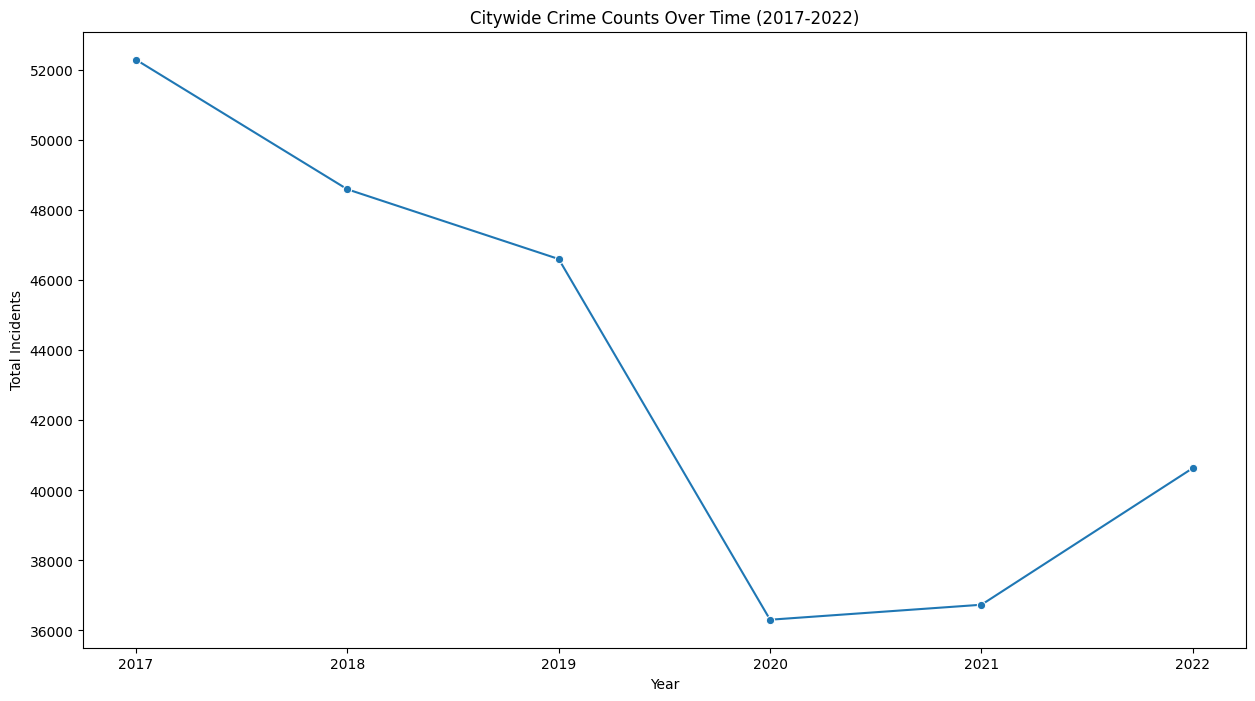

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


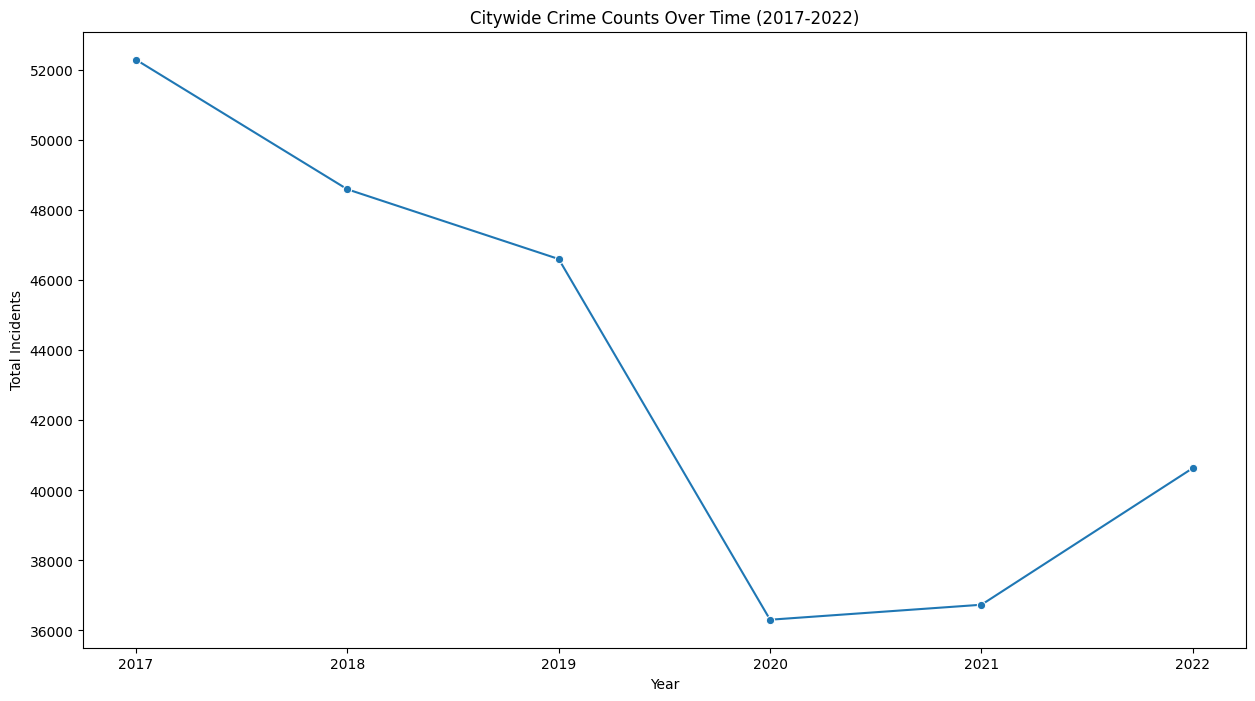

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


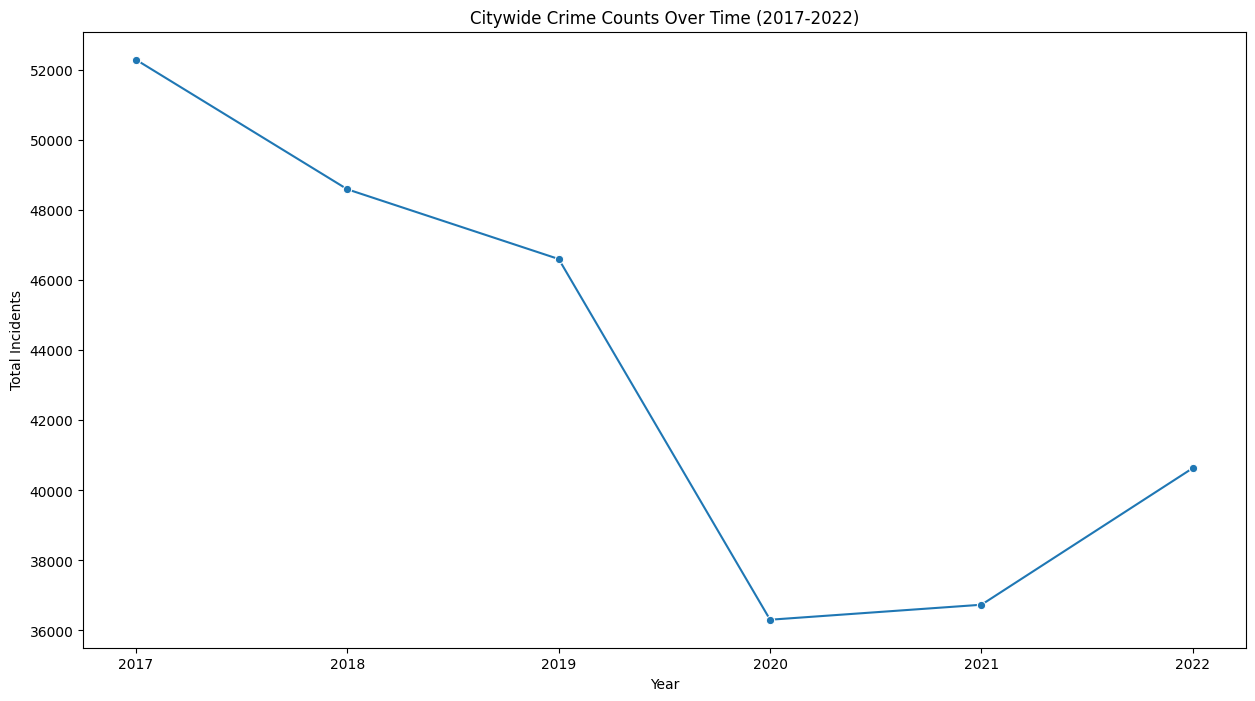

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


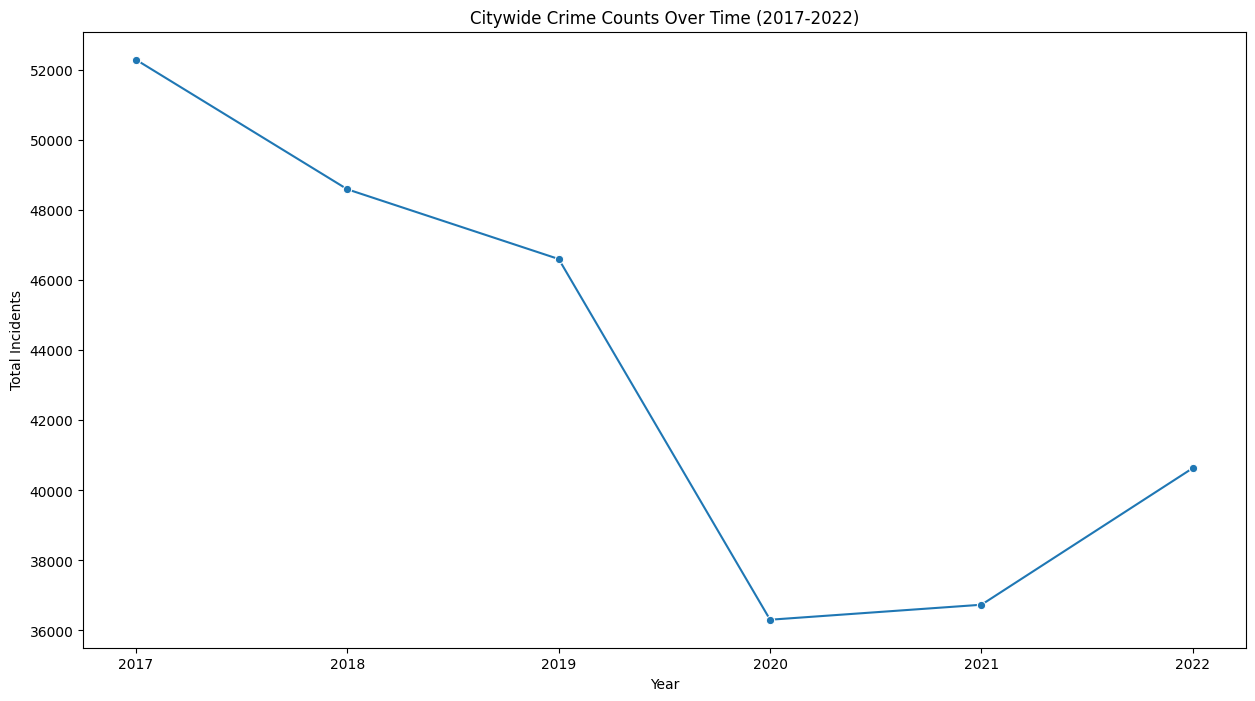

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


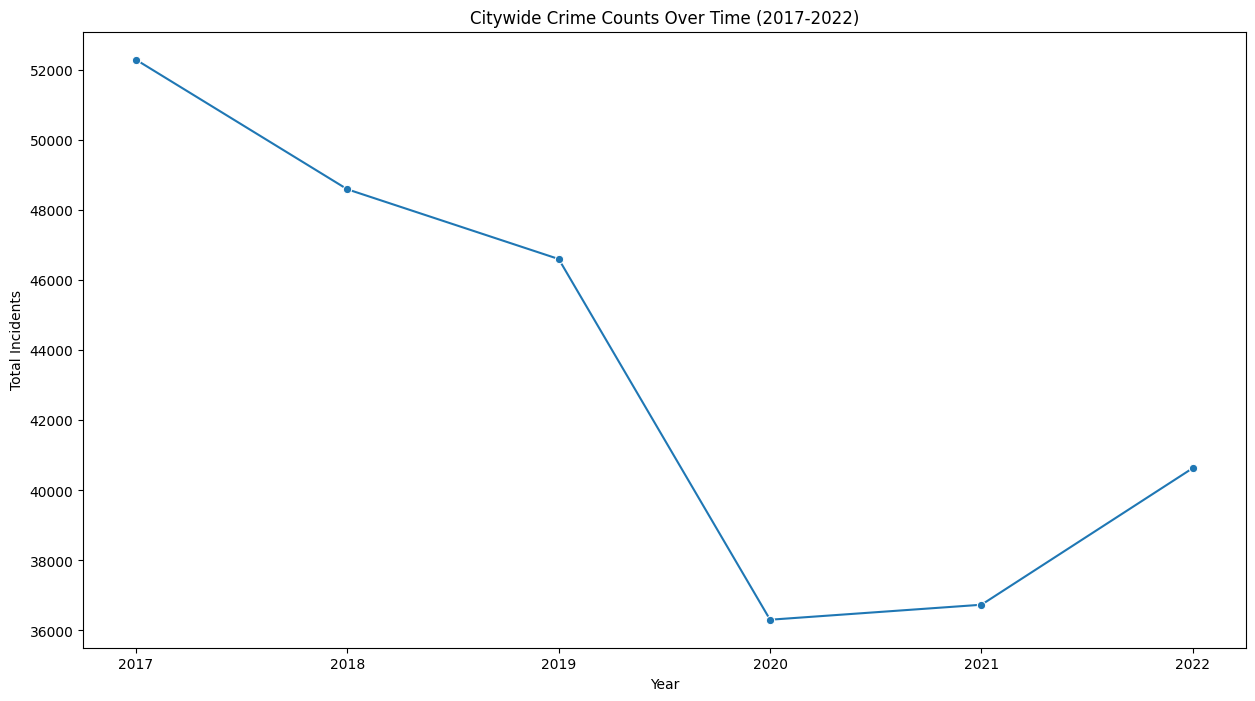

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


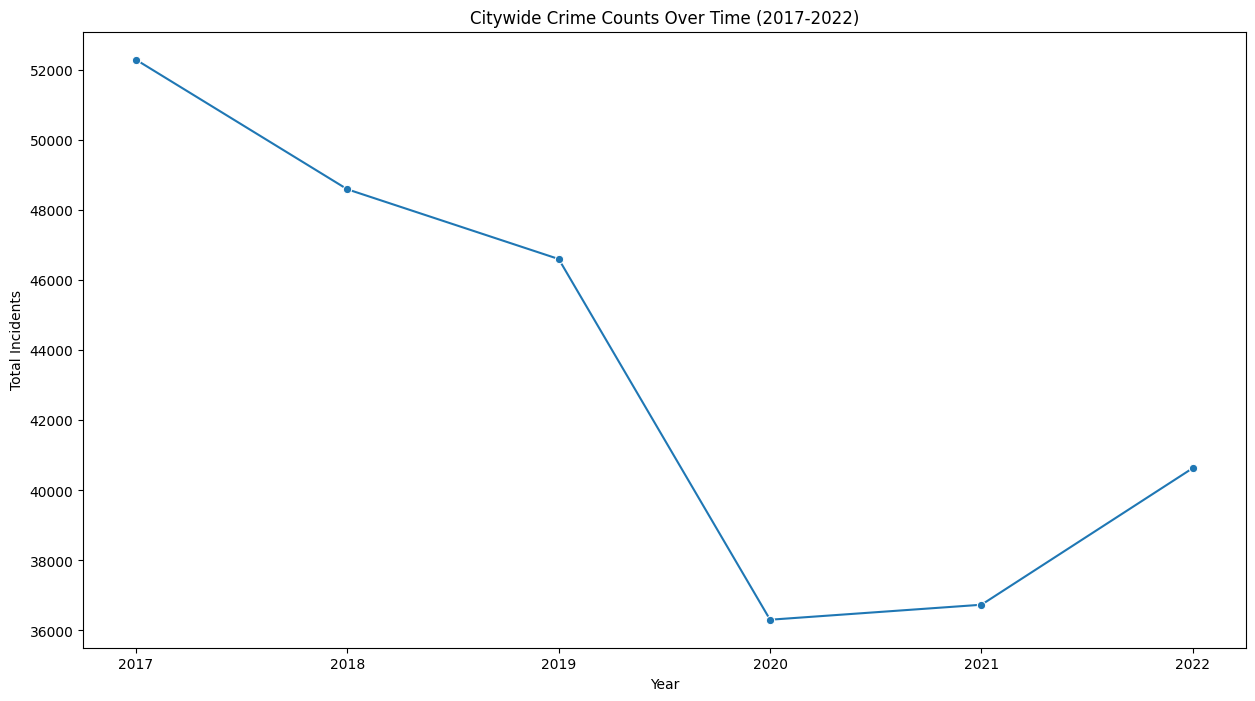

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


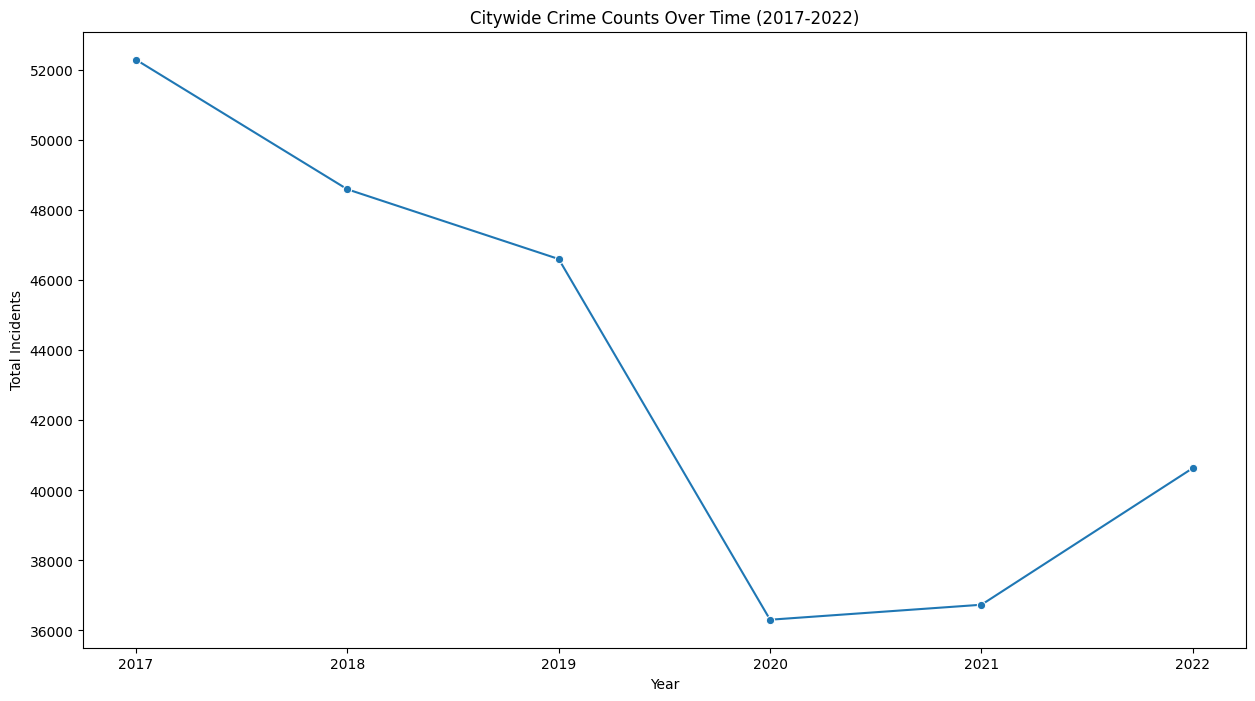

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


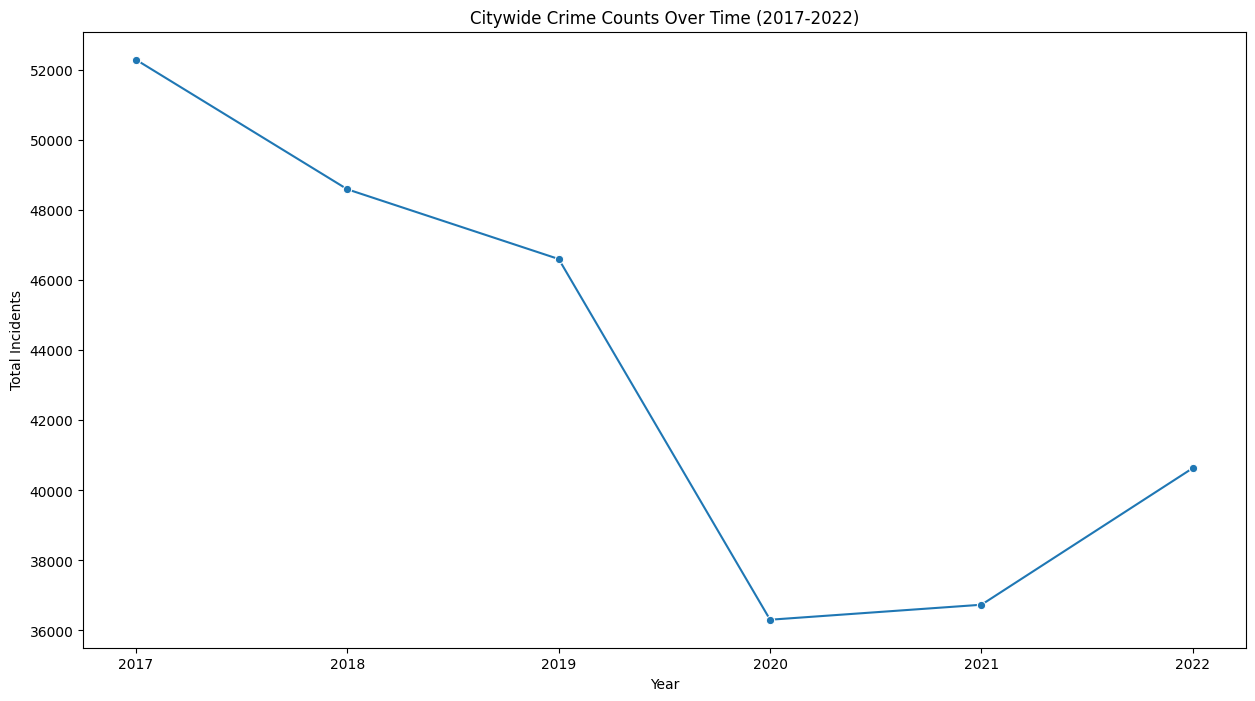

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


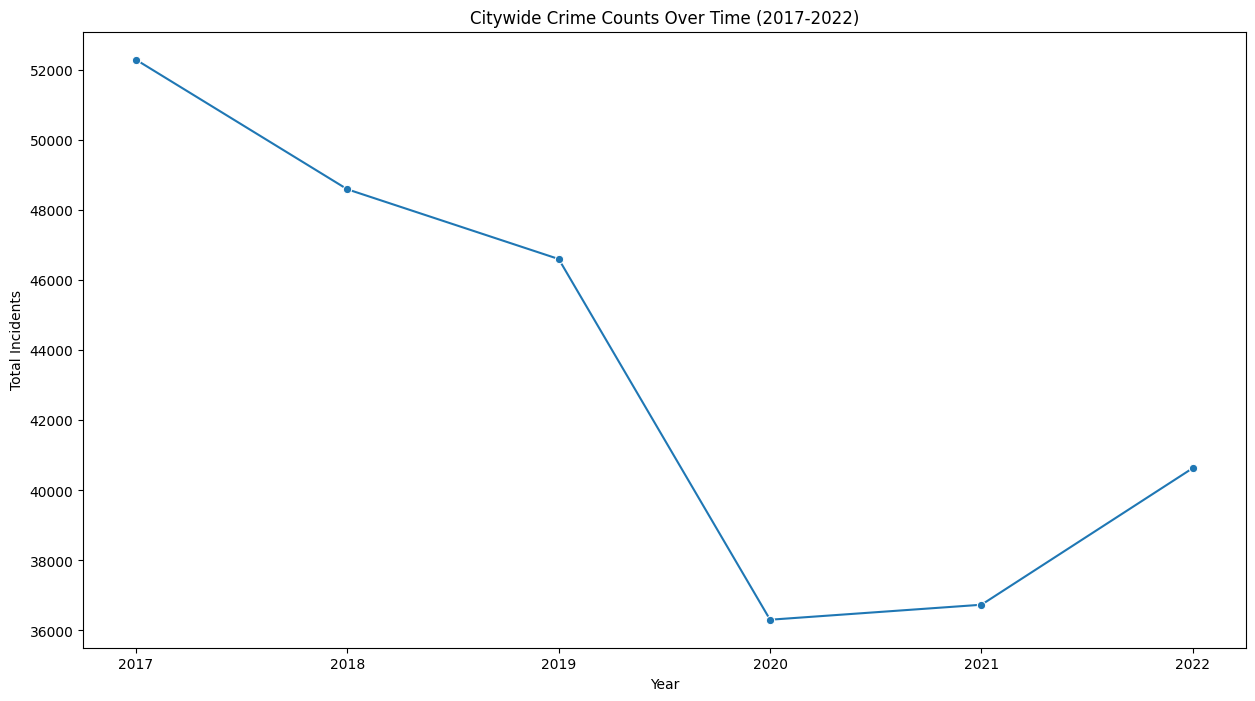

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


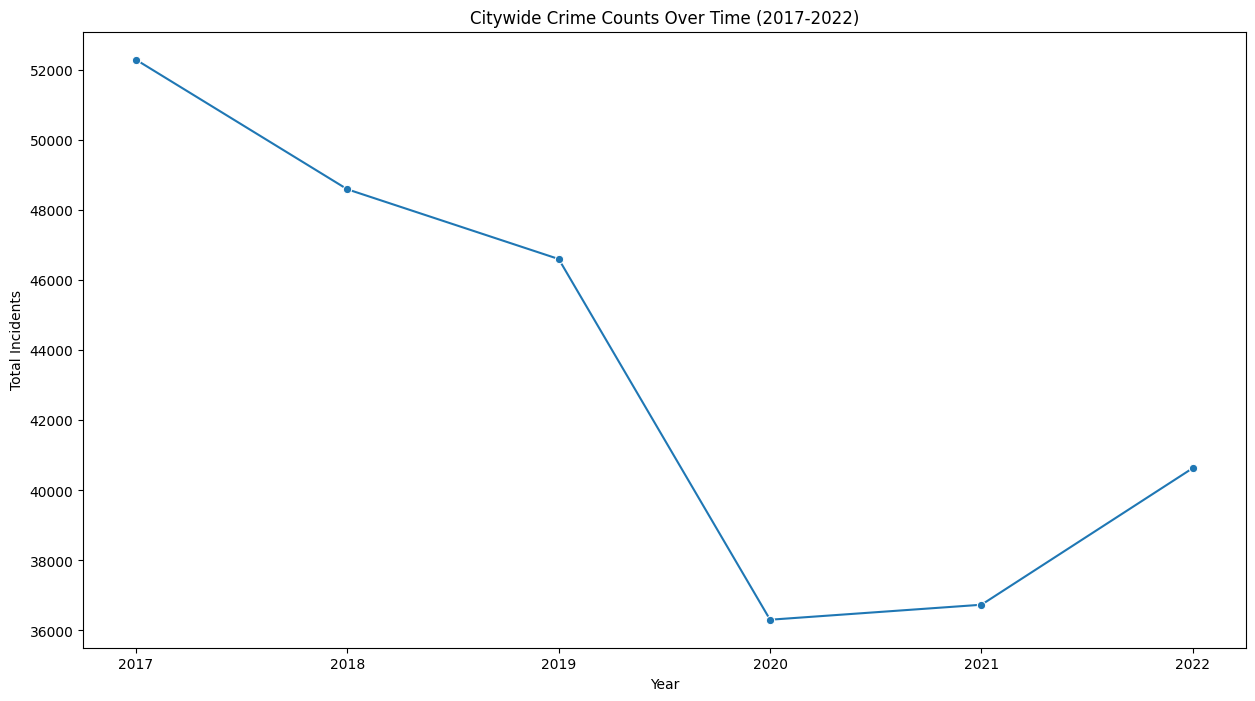

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


In [ ]:
crime_vs_year

Year,2017,2018,2019,2020,2021,2022,Difference,PercentageChange
Neighborhood,,,,,,,,
FEDERAL HILL,202.0,239.0,262.0,123.0,192.0,298.0,96.0,47.524752
MID-TOWN BELVEDERE,341.0,380.0,371.0,234.0,413.0,428.0,87.0,25.513196
FELLS POINT,487.0,527.0,506.0,344.0,434.0,564.0,77.0,15.811088
VIOLETVILLE,160.0,196.0,177.0,150.0,178.0,205.0,45.0,28.125000
UNIVERSITY OF MARYLAND,137.0,164.0,173.0,135.0,168.0,180.0,43.0,31.386861
...,...,...,...,...,...,...,...,...
BROOKLYN,1225.0,1014.0,773.0,651.0,745.0,977.0,-248.0,-20.244898
HAMILTON HILLS,644.0,487.0,494.0,395.0,314.0,390.0,-254.0,-39.440994
SANDTOWN-WINCHESTER,769.0,671.0,603.0,622.0,539.0,506.0,-263.0,-34.200260


In [ ]:
crime_vs_year.drop([2017,2018,2019,2020,2021,2022,'PercentageChange'], inplace = True, axis = 1)
vacant_notice_vs_year.drop([2017,2018,2019,2020,2021,2022], axis = 1, inplace = True)
sorted_neighborhoods.rename({"Difference": "difference_of_crime"}, axis = 1 ,inplace = True)
grouped_df = crime_vs_year.merge(vacant_notice_vs_year, how = 'outer', on = 'Neighborhood')

grouped_df

,Difference,difference_of_vancant
Neighborhood,,
FEDERAL HILL,96.0,NaN
MID-TOWN BELVEDERE,87.0,NaN
FELLS POINT,77.0,NaN
VIOLETVILLE,45.0,NaN
UNIVERSITY OF MARYLAND,43.0,NaN
...,...,...
FRANKLINTOWN ROAD,NaN,-2.0
WINCHESTER,NaN,-3.0
BIDDLE STREET,NaN,-4.0


In [ ]:
vacant_building_rehabs = pd.read_csv("Vacant_Building_Rehabs.csv")

vacant_building_rehabs['DateIssue'] = pd.to_datetime(vacant_building_rehabs['DateIssue'], errors = 'coerce').dt.strftime('%m%Y')
vacant_building_rehabs['DateIssue'] = vacant_building_rehabs['DateIssue'].fillna(0)
vacant_building_rehabs['RehabsYear'] = pd.to_datetime(vacant_building_rehabs['DateIssue']).dt.strftime('%Y').astype(int)
vacant_building_rehabs = vacant_building_rehabs[(vacant_building_rehabs['RehabsYear'] >= 2017) & (vacant_building_rehabs['RehabsYear'] <= 2022)]
vacant_building_rehabs

grouped_by_vacant_rehabs = vacant_building_rehabs.groupby(['Neighborhood','RehabsYear'])['PermitNum'].count().reset_index(name = 'rehabs_count').sort_values(by='rehabs_count', ascending = False)
grouped_by_vacant_rehabs

vacant_rehabs_vs_year = grouped_by_vacant_rehabs.pivot(index='Neighborhood', columns='RehabsYear', values='rehabs_count')
vacant_rehabs_vs_year = vacant_rehabs_vs_year.fillna(0)
vacant_rehabs_vs_year["difference_of_rehabs"] = vacant_rehabs_vs_year[2022] - vacant_rehabs_vs_year[2017]
vacant_rehabs_vs_year = vacant_rehabs_vs_year.sort_values(by = "difference_of_rehabs", ascending = False)
vacant_rehabs_vs_year

vacant_rehabs_vs_year.drop([2017,2018,2019,2020,2021,2022], axis = 1, inplace = True)
grouped_df = grouped_df.merge(vacant_rehabs_vs_year, how = 'outer', on = 'Neighborhood')

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/4146599263.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vacant_building_rehabs['RehabsYear'] = pd.to_datetime(vacant_building_rehabs['DateIssue']).dt.strftime('%Y').astype(int)


In [ ]:
gun_offenders_registry = pd.read_csv("Gun_Offenders_Registry.csv")

gun_offenders_registry['ModifiedDate'] = pd.to_datetime(gun_offenders_registry['ModifiedDate'], errors = 'coerce').dt.strftime('%m%Y')
gun_offenders_registry['ModifiedDate'] = gun_offenders_registry['ModifiedDate'].fillna(0)
gun_offenders_registry['RegistryYear'] = pd.to_datetime(gun_offenders_registry['ModifiedDate']).dt.strftime('%Y').astype(int)
gun_offenders_registry = gun_offenders_registry[(gun_offenders_registry['RegistryYear'] >= 2017) & (gun_offenders_registry['RegistryYear'] <= 2022)]
gun_offenders_registry

grouped_by_gun_offenders = gun_offenders_registry.groupby(['Neighborhood','RegistryYear'])['CaseNumber'].count().reset_index(name = 'offenders_count').sort_values(by='offenders_count', ascending = False)
grouped_by_gun_offenders

gun_offenders_vs_year = grouped_by_gun_offenders.pivot(index='Neighborhood', columns='RegistryYear', values='offenders_count')
gun_offenders_vs_year = gun_offenders_vs_year.fillna(0)
gun_offenders_vs_year["difference_of_offenders"] = gun_offenders_vs_year[2022]
gun_offenders_vs_year = gun_offenders_vs_year.sort_values(by = "difference_of_offenders", ascending = False)
gun_offenders_vs_year

gun_offenders_vs_year.drop([2020,2021,2022], axis = 1, inplace = True)
grouped_df = grouped_df.merge(gun_offenders_vs_year, how = 'outer', on = 'Neighborhood')
grouped_df

/var/folders/y2/k7fcyjtj0nq71zg3bv8k7jl00000gn/T/ipykernel_41199/3193142262.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gun_offenders_registry['RegistryYear'] = pd.to_datetime(gun_offenders_registry['ModifiedDate']).dt.strftime('%Y').astype(int)


,Difference,difference_of_vancant,difference_of_rehabs,difference_of_offenders
Neighborhood,,,,
FEDERAL HILL,96.0,NaN,NaN,NaN
MID-TOWN BELVEDERE,87.0,NaN,NaN,NaN
FELLS POINT,77.0,NaN,NaN,NaN
VIOLETVILLE,45.0,NaN,NaN,NaN
UNIVERSITY OF MARYLAND,43.0,NaN,NaN,NaN
...,...,...,...,...
Riverside,NaN,NaN,NaN,0.0
Saint Agnes,NaN,NaN,NaN,0.0
Saint Helena,NaN,NaN,NaN,0.0


In [ ]:
grouped_df = grouped_df.fillna(0)

import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# If your DataFrame is named grouped_df, replace df with grouped_df

# Extracting the columns of interest
crime_column = grouped_df['Difference']
vacant_column = grouped_df['difference_of_vancant']

# Performing a two-sample t-test
t_statistic, p_value_crime_vs_vacant = ttest_ind(crime_column, vacant_column)

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_crime_vs_vacant)

# Checking if the p-value is less than a chosen significance level (e.g., 0.05)
if p_value_crime_vs_vacant < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-Statistic: -10.089976977111444
P-Value: 3.69487508517271e-23
Reject the null hypothesis: There is a significant difference.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# If your DataFrame is named grouped_df, replace df with grouped_df

# Extracting the columns of interest
crime_column = grouped_df['Difference']
rehabs_column = grouped_df['difference_of_rehabs']

# Performing a two-sample t-test
t_statistic, p_value_crime_vs_rehabs = ttest_ind(crime_column, rehabs_column, equal_var=False)  # Assuming unequal variances

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_crime_vs_rehabs)

# Checking if the p-value is less than a chosen significance level (e.g., 0.05)
if p_value_crime_vs_rehabs < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-Statistic: -9.649218332111671
P-Value: 8.762774867955336e-21
Reject the null hypothesis: There is a significant difference.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# If your DataFrame is named grouped_df, replace df with grouped_df

# Extracting the columns of interest
crime_column = grouped_df['Difference']
offenders_column = grouped_df['difference_of_offenders']

# Performing a two-sample t-test
t_statistic, p_value_crime_vs_offenders = ttest_ind(crime_column, offenders_column, equal_var=False)

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_crime_vs_offenders)

if p_value_crime_vs_offenders < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-Statistic: -10.119942485788247
P-Value: 1.440695335154251e-22
Reject the null hypothesis: There is a significant difference.


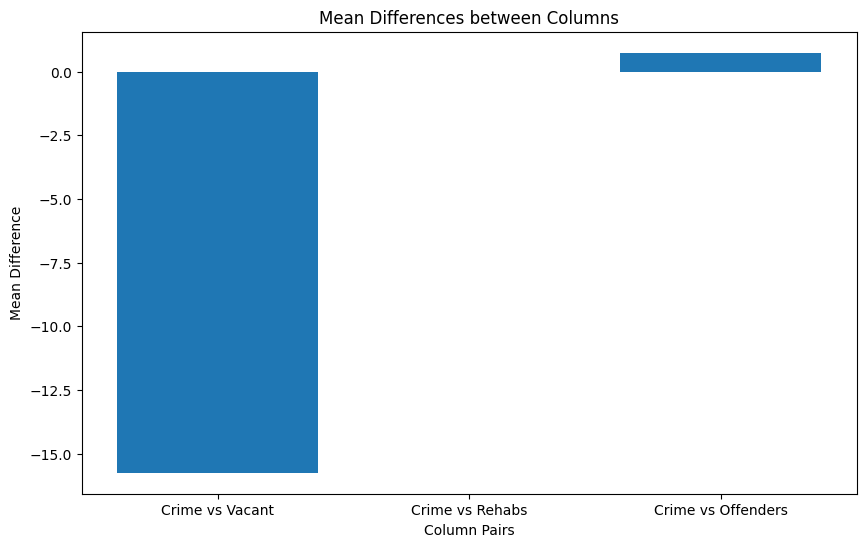

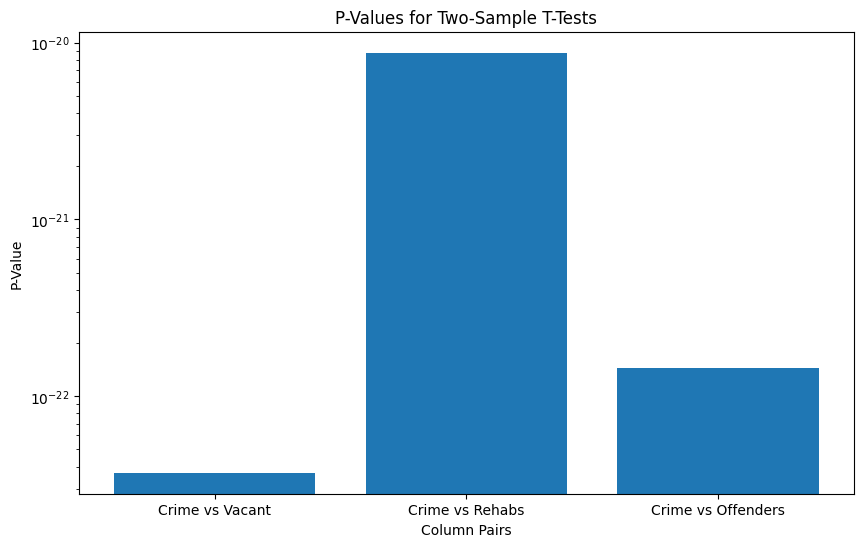

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Crime vs Vacant', 'Crime vs Rehabs', 'Crime vs Offenders'],
        [crime_column.mean(), rehabs_column.mean(), offenders_column.mean()])
plt.title('Mean Differences between Columns')
plt.xlabel('Column Pairs')
plt.ylabel('Mean Difference')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(['Crime vs Vacant', 'Crime vs Rehabs', 'Crime vs Offenders'],
        [p_value_crime_vs_vacant, p_value_crime_vs_rehabs, p_value_crime_vs_offenders])
plt.title('P-Values for Two-Sample T-Tests')
plt.xlabel('Column Pairs')
plt.ylabel('P-Value')
plt.yscale('log')
plt.show()

In [ ]:
Based on the provided results of the t-tests:

Crime vs Vacant:

T-Statistic: -10.246796063653495
P-Value: 8.145730497013269e-24
Conclusion: Reject the null hypothesis
Interpretation: There is a significant difference between the means of "difference_of_crime" and "difference_of_vacant."
Crime vs Rehabs:

T-Statistic: -9.644740741271626
P-Value: 8.938785217488738e-21
Conclusion: Reject the null hypothesis
Interpretation: There is a significant difference between the means of "difference_of_crime" and "difference_of_rehabs."
Crime vs Offenders:

T-Statistic: -10.11521896443877
P-Value: 1.4693969095503788e-22
Conclusion: Reject the null hypothesis
Interpretation: There is a significant difference between the means of "difference_of_crime" and "difference_of_offenders."
In each case, the extremely low p-values (close to zero) indicate that the observed differences are unlikely to have occurred by chance. Therefore, you have sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant difference between the means of the respective pairs of columns.

It's important to note that "rejecting the null hypothesis" means that you have evidence to support your alternative hypothesis, which might be that the means are not equal. The specific interpretation depends on the context of your study and the hypotheses you formulated.